# BY : BOD BCA TEAM

Hasil di kaggle = 82.385 (public)

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings

SEED = 69
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)
AUTOTUNE = tf.data.AUTOTUNE

In [2]:
df = pd.read_csv("train.csv").sort_values('Tahun').reset_index(drop=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              8000 non-null   int64  
 1   Tahun                           8000 non-null   int64  
 2   Nama_Negara                     8000 non-null   object 
 3   Wilayah                         8000 non-null   object 
 4   Jenis_Tanaman                   7781 non-null   object 
 5   Total_Curah_Hujan_mm            7821 non-null   float64
 6   Emisi_CO2_JT_Ton                8000 non-null   float64
 7   Hasil_Panen_Ton_per_HA          7800 non-null   float64
 8   Kejadian_Cuaca_Ekstrim          8000 non-null   int64  
 9   Akses_Irigasi                   7819 non-null   float64
 10  Penggunaan_Pestisida_KG_per_HA  8000 non-null   float64
 11  Penggunaan_Pupuk_KG_per_HA      8000 non-null   float64
 12  Indeks_Kesehatan_Tanah          80

In [4]:
df['ID'].nunique()

8000

In [5]:
df = df.drop(columns=['ID'], axis=1)
df.head()

Tahun Nama_Negara     Wilayah Jenis_Tanaman  Total_Curah_Hujan_mm  \
0   1990   Australia  Queensland        Fruits               2265.29   
1   1990      Russia       Volga      Soybeans               2110.11   
2   1990       China        East      Soybeans               2614.86   
3   1990   Argentina   Northwest          Rice               1222.81   
4   1990      Russia       Volga        Barley               2087.37   

   Emisi_CO2_JT_Ton  Hasil_Panen_Ton_per_HA  Kejadian_Cuaca_Ekstrim  \
0              2.33                   2.030                       4   
1              9.34                   0.800                       4   
2             25.24                   2.034                      10   
3             11.90                   3.690                       6   
4             22.03                   0.648                       5   

   Akses_Irigasi  Penggunaan_Pestisida_KG_per_HA  Penggunaan_Pupuk_KG_per_HA  \
0          79.39                           48.80                        3.30   
1          64.44                            6.22                       65.73   
2          92.69                           44.21                        4.35   
3          96.53                           45.30                       42.43   
4          80.97                           44.22                       54.19   

   Indeks_Kesehatan_Tanah  Strategi_Adaptasi  Suhu_Rata_Rata_C  
0                   77.63     Tanpa Adaptasi             14.70  
1                   46.02     Tanpa Adaptasi             24.12  
2                   79.57  Pertanian Organik             28.80  
3                   80.38      Manajemen Air             17.81  
4                   71.67  Pertanian Organik              3.46

In [6]:
df['Tahun'] = df['Tahun'].astype(str)

In [7]:
num_col = [col for col in df.columns if df[col].dtype in [np.int64, np.float64]]
obj_col = [col for col in df.columns if col not in num_col]

print('num col :', num_col)
print('obect col :', obj_col)

num col : ['Total_Curah_Hujan_mm', 'Emisi_CO2_JT_Ton', 'Hasil_Panen_Ton_per_HA', 'Kejadian_Cuaca_Ekstrim', 'Akses_Irigasi', 'Penggunaan_Pestisida_KG_per_HA', 'Penggunaan_Pupuk_KG_per_HA', 'Indeks_Kesehatan_Tanah', 'Suhu_Rata_Rata_C']
obect col : ['Tahun', 'Nama_Negara', 'Wilayah', 'Jenis_Tanaman', 'Strategi_Adaptasi']


In [8]:
df_num_col = df[num_col]
df_obj_col = df[obj_col]

### Numeric Column

##### Univariate Analysis

In [9]:
df_num_col.describe()

Total_Curah_Hujan_mm  Emisi_CO2_JT_Ton  Hasil_Panen_Ton_per_HA  \
count           7821.000000       8000.000000             7800.000000   
mean            1615.503060         15.271184                2.238219   
std              807.932322          8.551214                0.996626   
min              200.170000          0.500000                0.450000   
25%              929.290000          7.860000                1.449000   
50%             1614.790000         15.250000                2.170000   
75%             2316.820000         22.820000                2.930000   
max             2999.670000         30.000000                5.000000   

       Kejadian_Cuaca_Ekstrim  Akses_Irigasi  Penggunaan_Pestisida_KG_per_HA  \
count             8000.000000    7819.000000                     8000.000000   
mean                 4.989750      55.394575                       24.920015   
std                  3.171814      26.034847                       14.454507   
min                  0.000000      10.010000                        0.000000   
25%                  2.000000      32.905000                       12.550000   
50%                  5.000000      55.340000                       24.930000   
75%                  8.000000      77.770000                       37.382500   
max                 10.000000      99.990000                       49.990000   

       Penggunaan_Pupuk_KG_per_HA  Indeks_Kesehatan_Tanah  Suhu_Rata_Rata_C  
count                 8000.000000             8000.000000       8000.000000  
mean                    49.706654               64.824446         15.206680  
std                     28.674985               20.153617         11.490611  
min                      0.030000               30.000000         -4.990000  
25%                     25.160000               47.115000          5.377500  
50%                     49.270000               64.675000         15.140000  
75%                     74.430000               82.302500         25.340000  
max                     99.990000              100.000000         35.000000

In [10]:
df_num_col.isnull().sum()

Total_Curah_Hujan_mm              179
Emisi_CO2_JT_Ton                    0
Hasil_Panen_Ton_per_HA            200
Kejadian_Cuaca_Ekstrim              0
Akses_Irigasi                     181
Penggunaan_Pestisida_KG_per_HA      0
Penggunaan_Pupuk_KG_per_HA          0
Indeks_Kesehatan_Tanah              0
Suhu_Rata_Rata_C                    0
dtype: int64

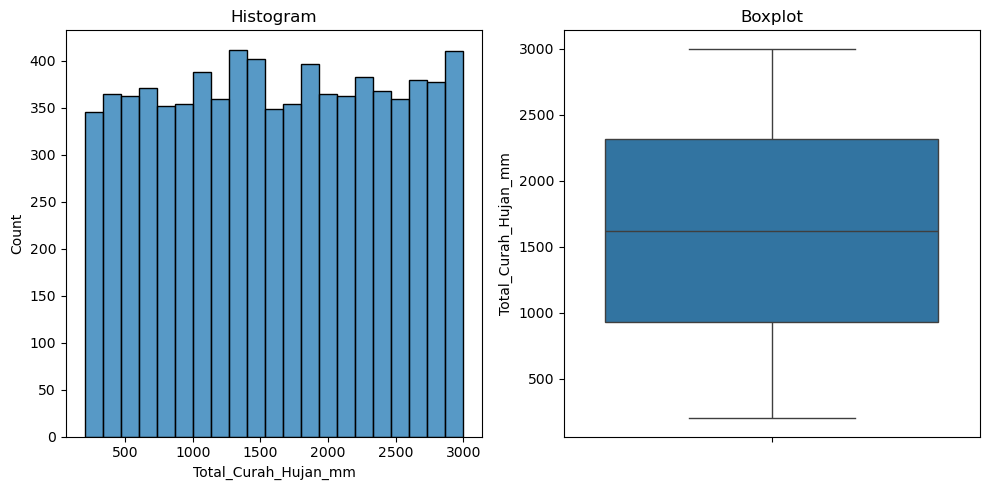

Columns : Total_Curah_Hujan_mm
Skewness: -0.008712457760121133
Kurtosis: -1.1908997100659497
p-value : 0.0
Data is NOT normally distributed


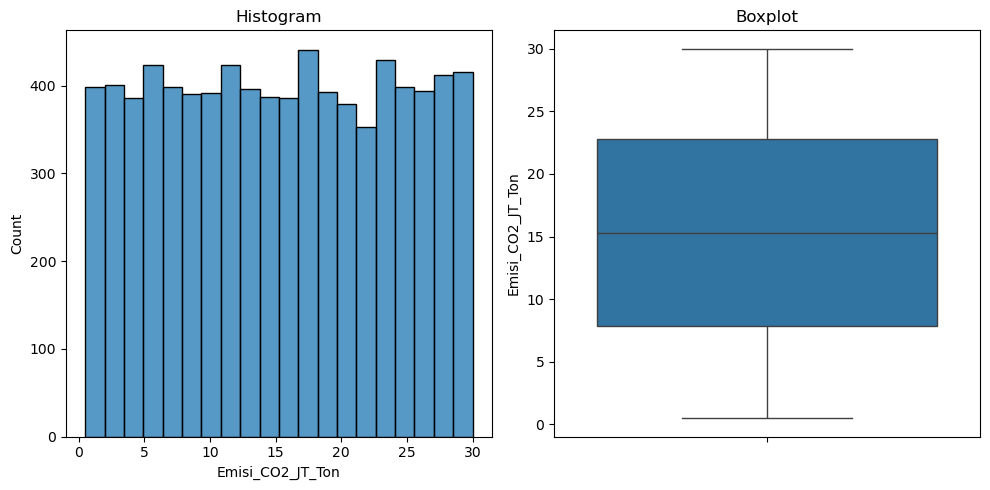

Columns : Emisi_CO2_JT_Ton
Skewness: 0.005556126599718587
Kurtosis: -1.2020944384030607
p-value : 0.0
Data is NOT normally distributed


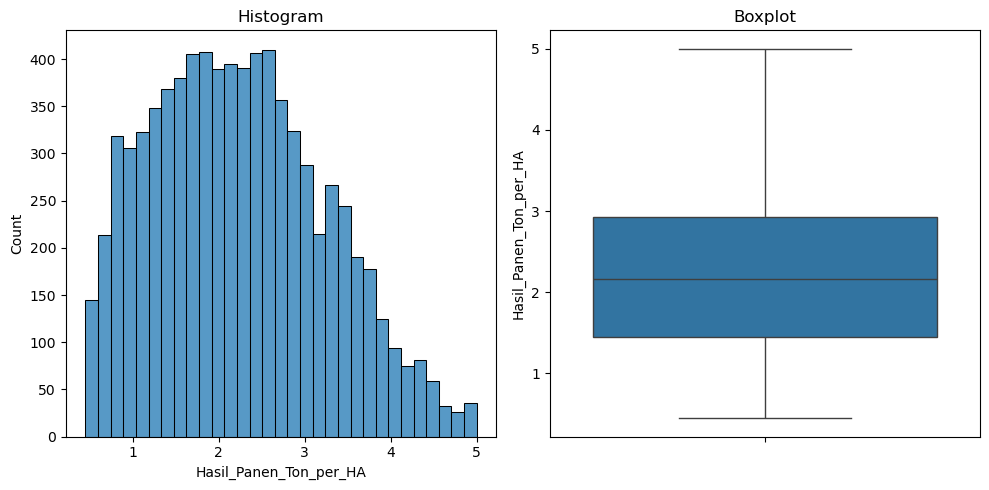

Columns : Hasil_Panen_Ton_per_HA
Skewness: 0.34522996804577977
Kurtosis: -0.5649449302931906
p-value : 2.435078381084178e-78
Data is NOT normally distributed


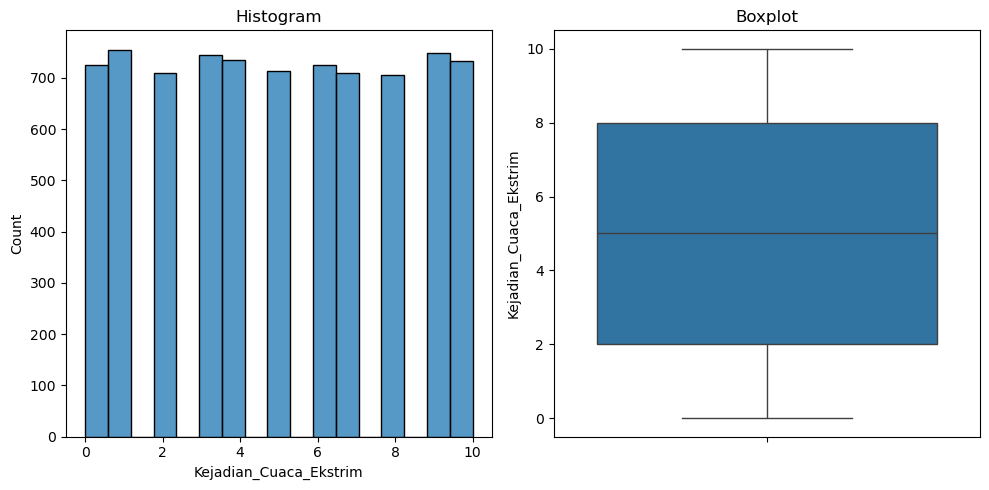

Columns : Kejadian_Cuaca_Ekstrim
Skewness: 0.009846139825921797
Kurtosis: -1.2276665066955907
p-value : 0.0
Data is NOT normally distributed


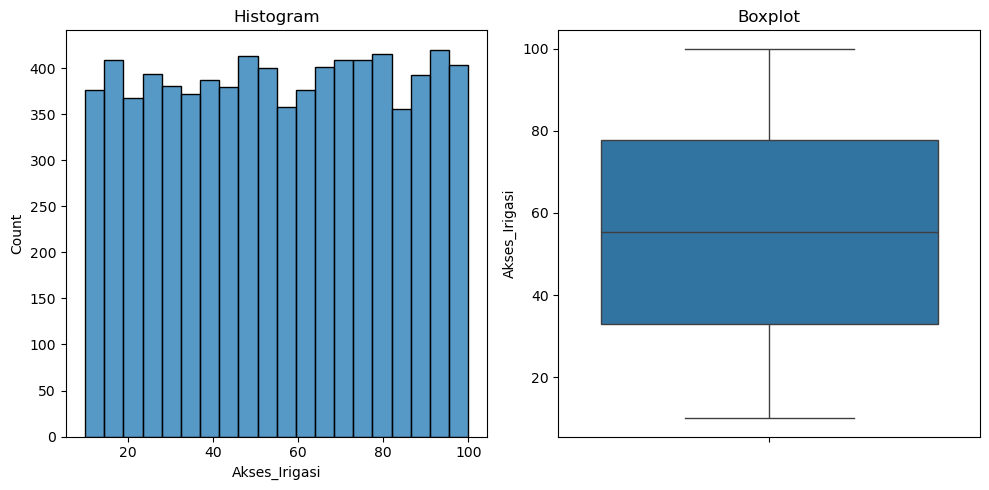

Columns : Akses_Irigasi
Skewness: -0.017509370443929483
Kurtosis: -1.2007793700893326
p-value : 0.0
Data is NOT normally distributed


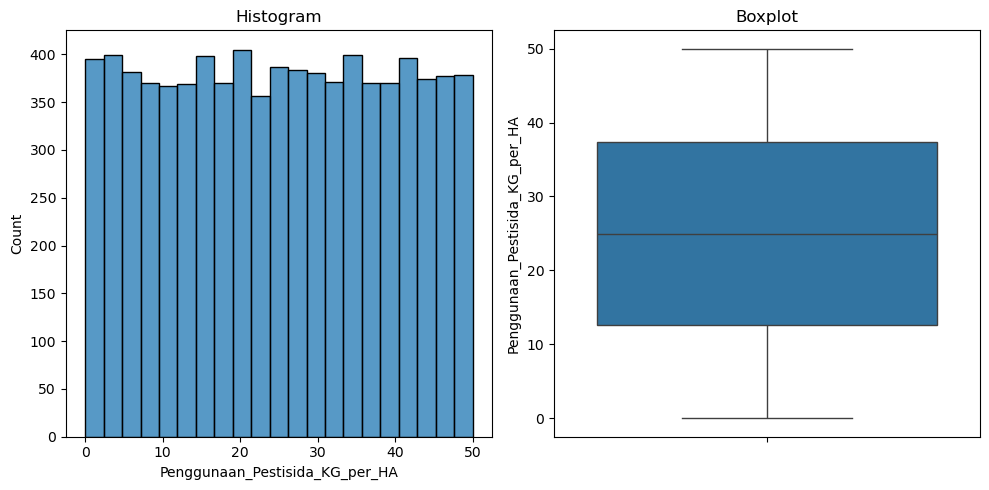

Columns : Penggunaan_Pestisida_KG_per_HA
Skewness: -0.002053784833365565
Kurtosis: -1.1990574754240497
p-value : 0.0
Data is NOT normally distributed


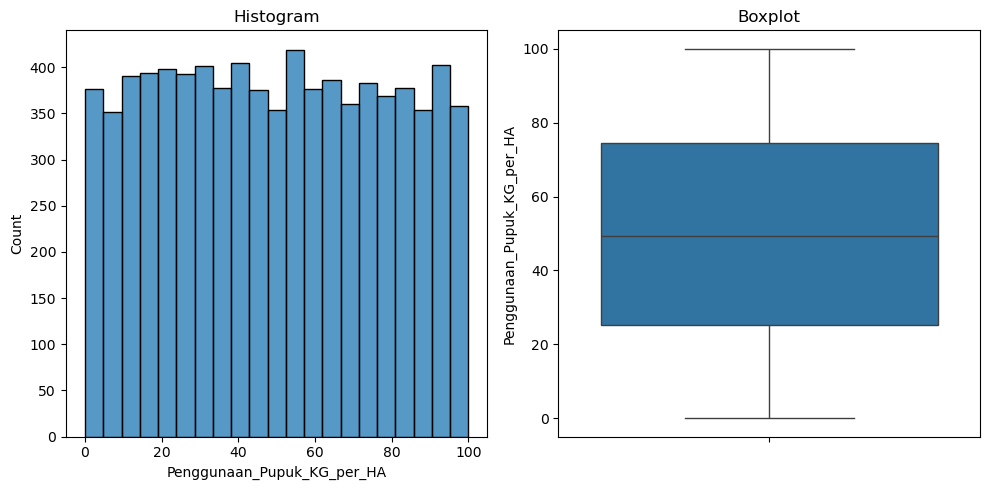

Columns : Penggunaan_Pupuk_KG_per_HA
Skewness: 0.022530985838201532
Kurtosis: -1.1909414407221233
p-value : 0.0
Data is NOT normally distributed


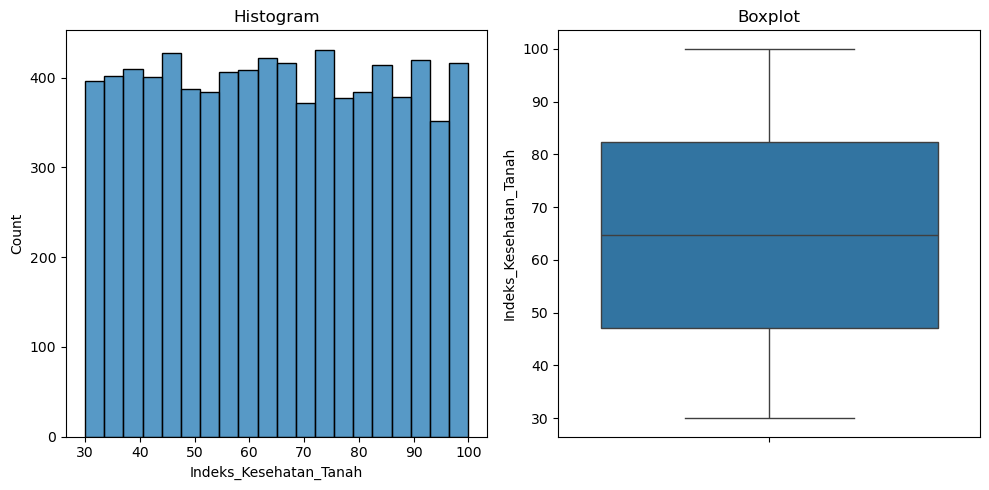

Columns : Indeks_Kesehatan_Tanah
Skewness: 0.01615837677933504
Kurtosis: -1.1909992091515686
p-value : 0.0
Data is NOT normally distributed


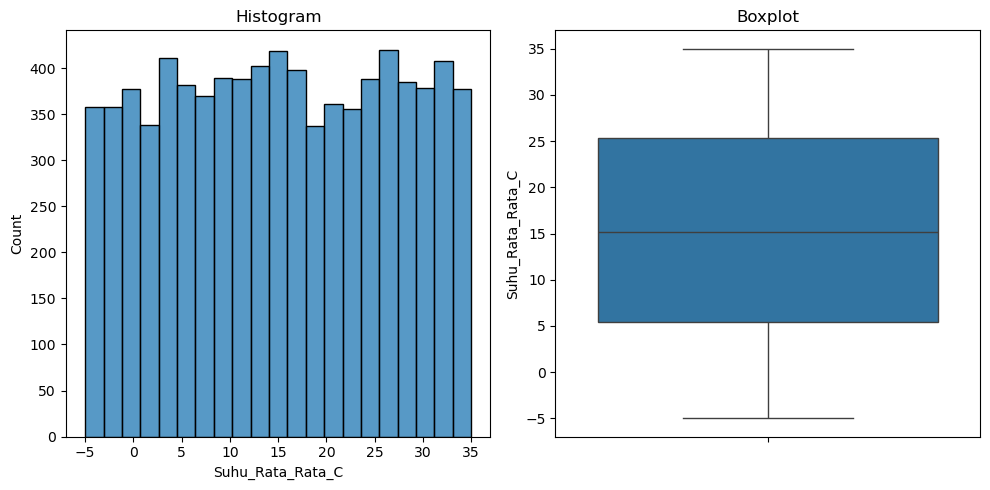

Columns : Suhu_Rata_Rata_C
Skewness: -0.011816812493574354
Kurtosis: -1.1918425002147681
p-value : 0.0
Data is NOT normally distributed


In [11]:
from scipy.stats import normaltest

for col in df_num_col.columns:
    data = df_num_col[col].dropna()  

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(data)
    plt.title('Histogram')

    plt.subplot(1,2,2)
    sns.boxplot(y=data)
    plt.title('Boxplot')

    plt.tight_layout()
    plt.show()

    print(f'Columns : {col}')
    print(f'Skewness: {data.skew()}')
    print(f'Kurtosis: {data.kurtosis()}')

    stat, p = normaltest(data)
    print(f'p-value : {p}')
    if p > 0.05:
        print("Data is normally distributed")
    else:
        print("Data is NOT normally distributed")

Dari hasil histogram, dan boxplot semua fiturnya memiliki kurtosis yang minus artinya datanya tersebar merata di seluruh nilai dan tidak menumpuk di sekitar mean. Lalu hasil skewness juga mendekati nilai 0 yang artinya datanya lumayan simetris. 

Note : 
1. Data tersebar merata --> membuat model lebih kesulitan prediksi karena banyak pattern yang harus dipelajarin tapi akan well generalization
2. Data bell shaped --> membuat model lbh mudah prediksi karena banyak nilai terkumpul di sekitar mean sehingga memiliki banyak data untuk memprediksi nilai yang beradar di sekitar mean, tapi akan kesusahan memprediksi extreme values

##### Bivariate Analysis

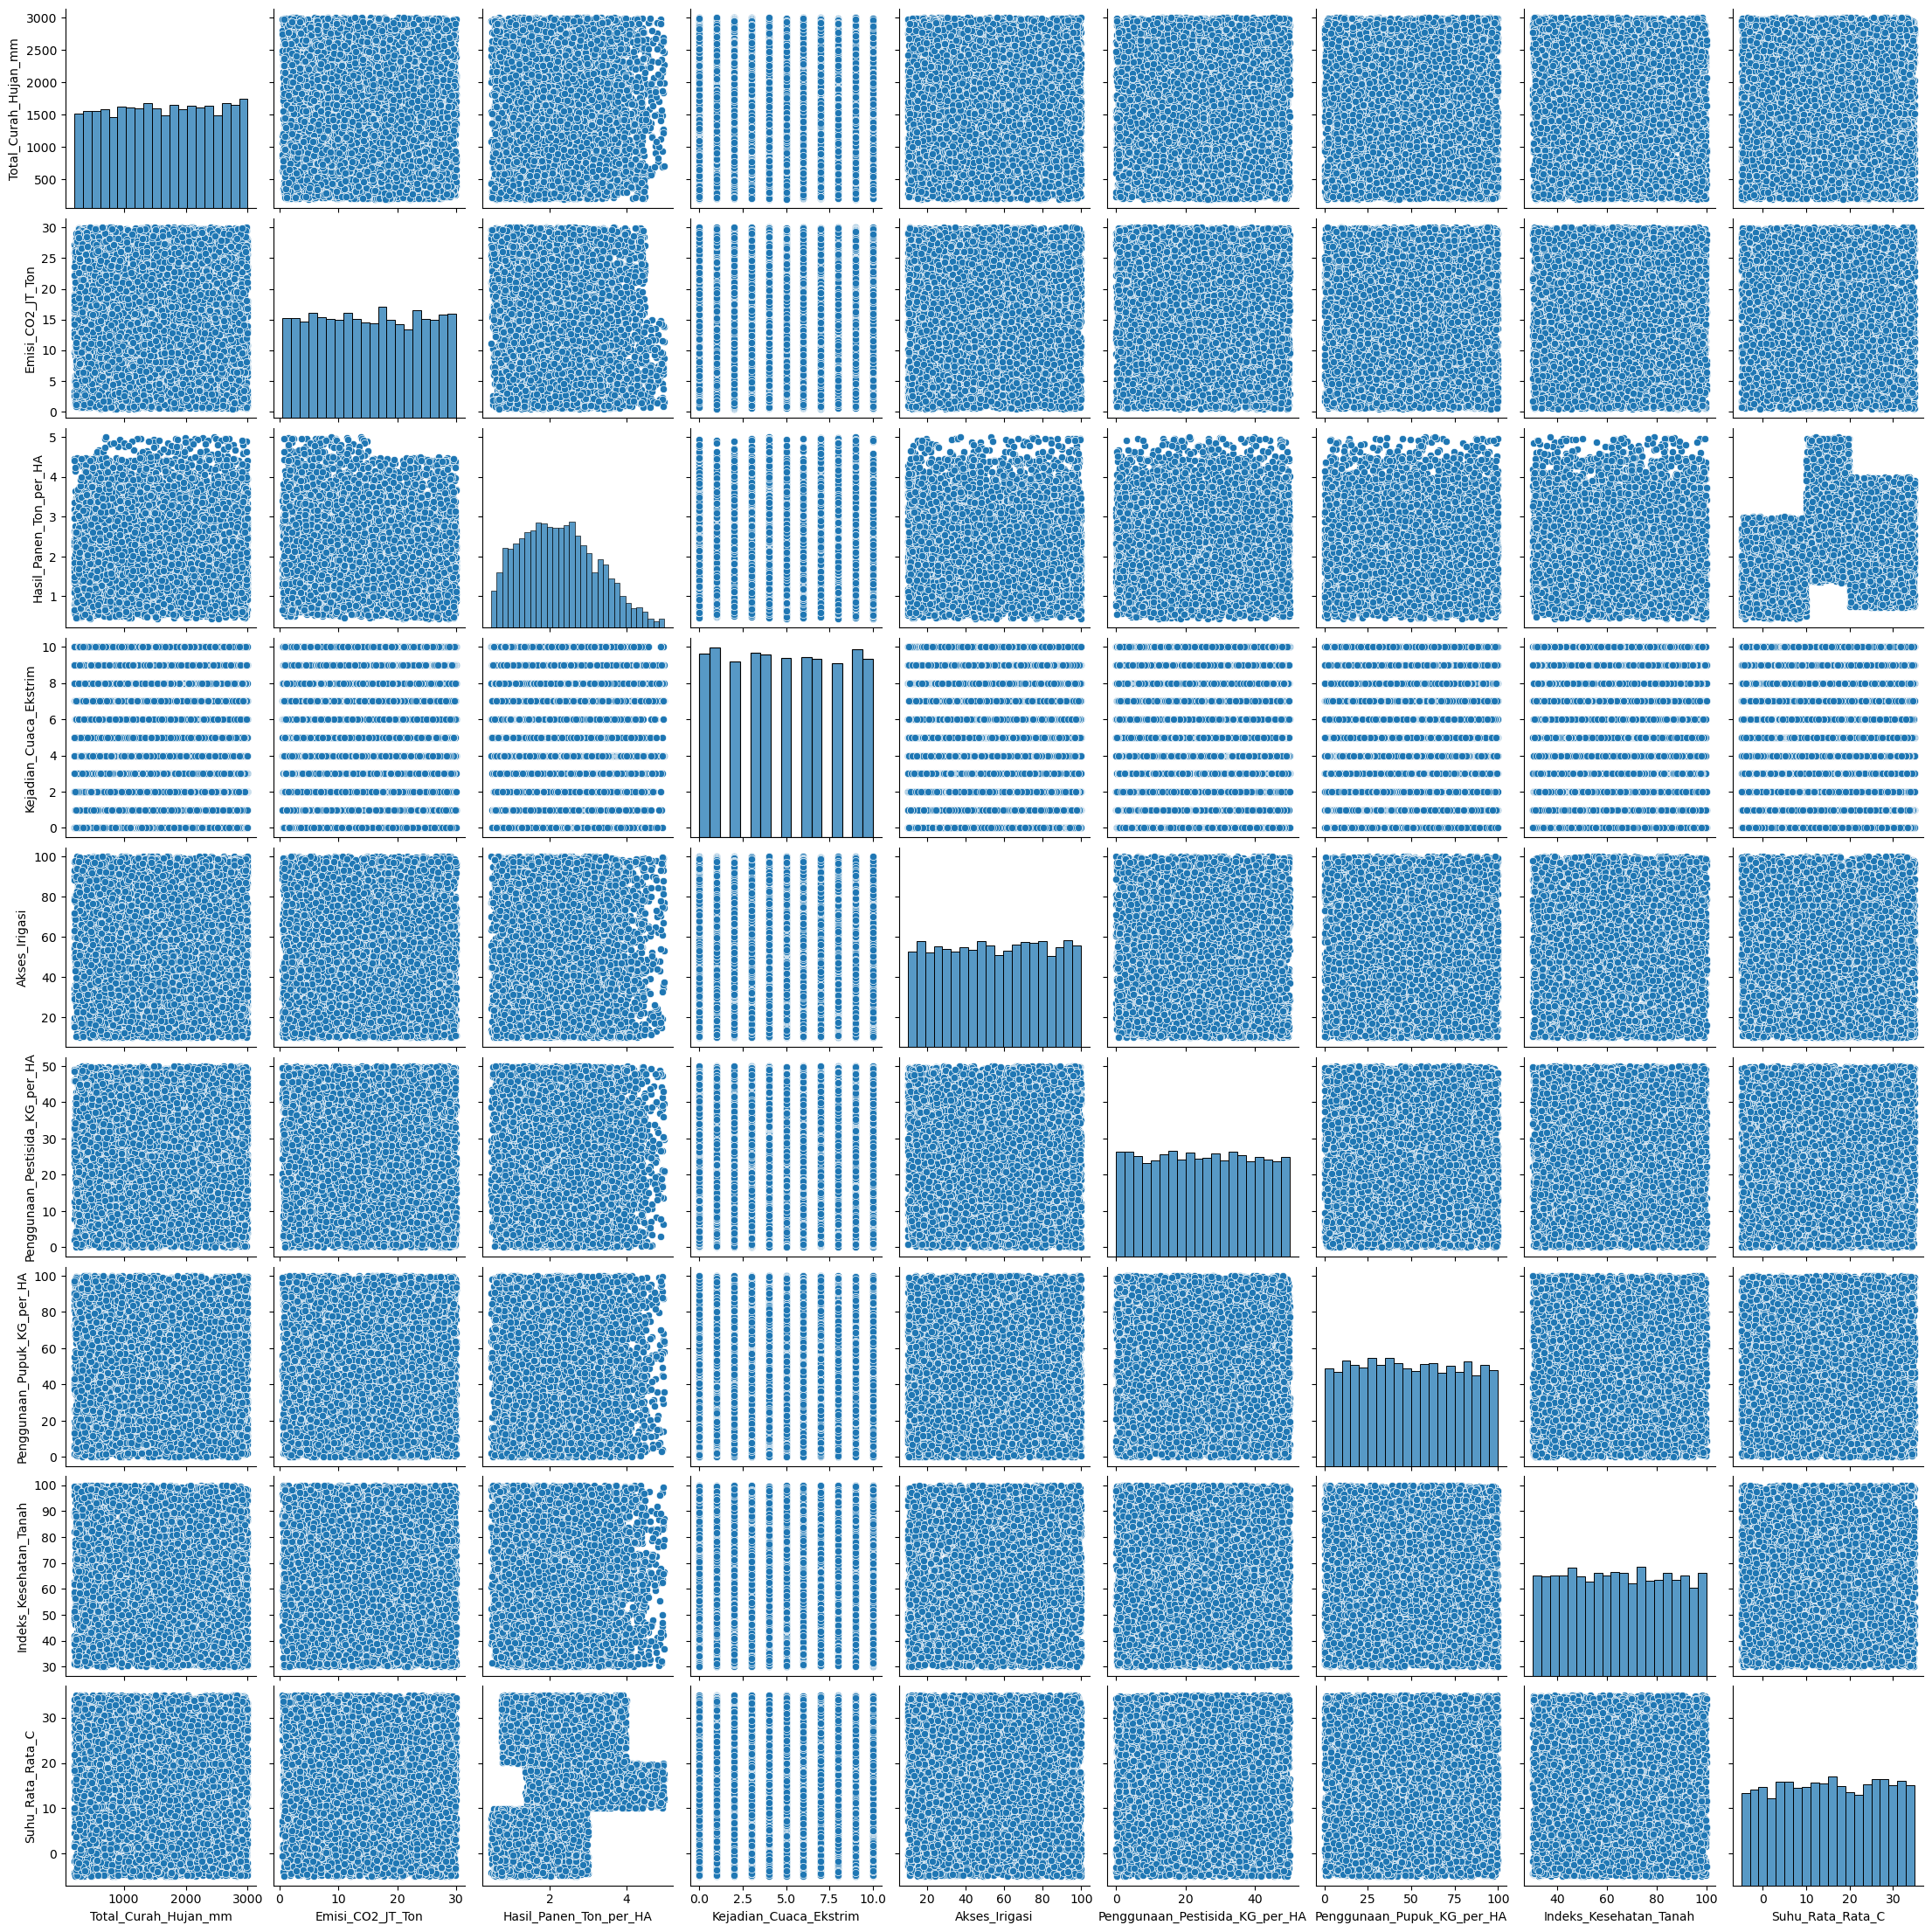

In [12]:
sns.pairplot(df_num_col.dropna())
plt.show()

In [13]:
df_clean = df_num_col.dropna()
corr_matrix = df_clean.corr(method='pearson')
corr_matrix

Total_Curah_Hujan_mm  Emisi_CO2_JT_Ton  \
Total_Curah_Hujan_mm                        1.000000         -0.009380   
Emisi_CO2_JT_Ton                           -0.009380          1.000000   
Hasil_Panen_Ton_per_HA                      0.022544         -0.086981   
Kejadian_Cuaca_Ekstrim                      0.002673          0.002177   
Akses_Irigasi                              -0.012116          0.001725   
Penggunaan_Pestisida_KG_per_HA              0.005760          0.001543   
Penggunaan_Pupuk_KG_per_HA                 -0.021532         -0.007696   
Indeks_Kesehatan_Tanah                     -0.015541          0.006876   
Suhu_Rata_Rata_C                            0.010056         -0.001384   

                                Hasil_Panen_Ton_per_HA  \
Total_Curah_Hujan_mm                          0.022544   
Emisi_CO2_JT_Ton                             -0.086981   
Hasil_Panen_Ton_per_HA                        1.000000   
Kejadian_Cuaca_Ekstrim                        0.006636   
Akses_Irigasi                                -0.008479   
Penggunaan_Pestisida_KG_per_HA                0.002281   
Penggunaan_Pupuk_KG_per_HA                    0.007676   
Indeks_Kesehatan_Tanah                       -0.002000   
Suhu_Rata_Rata_C                              0.265961   

                                Kejadian_Cuaca_Ekstrim  Akses_Irigasi  \
Total_Curah_Hujan_mm                          0.002673      -0.012116   
Emisi_CO2_JT_Ton                              0.002177       0.001725   
Hasil_Panen_Ton_per_HA                        0.006636      -0.008479   
Kejadian_Cuaca_Ekstrim                        1.000000      -0.006229   
Akses_Irigasi                                -0.006229       1.000000   
Penggunaan_Pestisida_KG_per_HA                0.011968      -0.003455   
Penggunaan_Pupuk_KG_per_HA                    0.013440       0.008161   
Indeks_Kesehatan_Tanah                        0.013647       0.010217   
Suhu_Rata_Rata_C                             -0.009854      -0.022116   

                                Penggunaan_Pestisida_KG_per_HA  \
Total_Curah_Hujan_mm                                  0.005760   
Emisi_CO2_JT_Ton                                      0.001543   
Hasil_Panen_Ton_per_HA                                0.002281   
Kejadian_Cuaca_Ekstrim                                0.011968   
Akses_Irigasi                                        -0.003455   
Penggunaan_Pestisida_KG_per_HA                        1.000000   
Penggunaan_Pupuk_KG_per_HA                           -0.015072   
Indeks_Kesehatan_Tanah                                0.010109   
Suhu_Rata_Rata_C                                      0.006765   

                                Penggunaan_Pupuk_KG_per_HA  \
Total_Curah_Hujan_mm                             -0.021532   
Emisi_CO2_JT_Ton                                 -0.007696   
Hasil_Panen_Ton_per_HA                            0.007676   
Kejadian_Cuaca_Ekstrim                            0.013440   
Akses_Irigasi                                     0.008161   
Penggunaan_Pestisida_KG_per_HA                   -0.015072   
Penggunaan_Pupuk_KG_per_HA                        1.000000   
Indeks_Kesehatan_Tanah                           -0.002897   
Suhu_Rata_Rata_C                                 -0.019418   

                                Indeks_Kesehatan_Tanah  Suhu_Rata_Rata_C  
Total_Curah_Hujan_mm                         -0.015541          0.010056  
Emisi_CO2_JT_Ton                              0.006876         -0.001384  
Hasil_Panen_Ton_per_HA                       -0.002000          0.265961  
Kejadian_Cuaca_Ekstrim                        0.013647         -0.009854  
Akses_Irigasi                                 0.010217         -0.022116  
Penggunaan_Pestisida_KG_per_HA                0.010109          0.006765  
Penggunaan_Pupuk_KG_per_HA                   -0.002897         -0.019418  
Indeks_Kesehatan_Tanah                        1.000000         -0.012242  
Suhu_Rata_Rata_C      

Dari nilai korelasi antar fitur, semua nilainya mendekati 0 artinya fitur fiturnya tidak ada linear korelasi antar satu fitur dengan fitur lainnya terutama dengan target variable. 

Note : 
1. Non Linear relationship harus dicari
2. Jangan pakai model yang mengasumsikan linear correlationship seperti Linear Regression, Logistic Regression
3. Pertimbangkan log transform untuk mencari pattern "Log1p (np.log1)"

### Object Column

##### Univariate Analysis

In [14]:
df_obj_col.describe()

Tahun Nama_Negara Wilayah Jenis_Tanaman Strategi_Adaptasi
count   8000        8000    8000          7781              8000
unique    35          10      34            10                 5
top     2012         USA   South         Wheat     Manajemen Air
freq     263         831     617           819              1647

In [15]:
df_obj_col.isnull().sum()

Tahun                  0
Nama_Negara            0
Wilayah                0
Jenis_Tanaman        219
Strategi_Adaptasi      0
dtype: int64

In [16]:
for col in df_obj_col.columns:
    print(df_obj_col[col].value_counts())
    print("\n")

Tahun
2012    263
1999    261
2019    254
1991    252
2001    252
1996    243
2021    241
2013    241
1994    239
2008    239
2015    236
2016    236
2023    235
2004    234
1992    233
2000    232
2002    229
2024    228
2003    227
2020    224
2017    224
1997    223
2022    223
1995    223
2011    222
2009    221
1993    220
2010    217
2014    215
2005    214
2007    212
2006    199
2018    198
1990    195
1998    195
Name: count, dtype: int64


Nama_Negara
USA          831
Australia    826
Nigeria      826
China        823
India        818
Canada       801
Argentina    772
Russia       771
France       771
Brazil       761
Name: count, dtype: int64


Wilayah
South                           617
Northeast                       583
North                           427
Central                         370
Victoria                        230
Punjab                          222
'South East'                    219
Ontario                         217
'New South Wales'               216
West

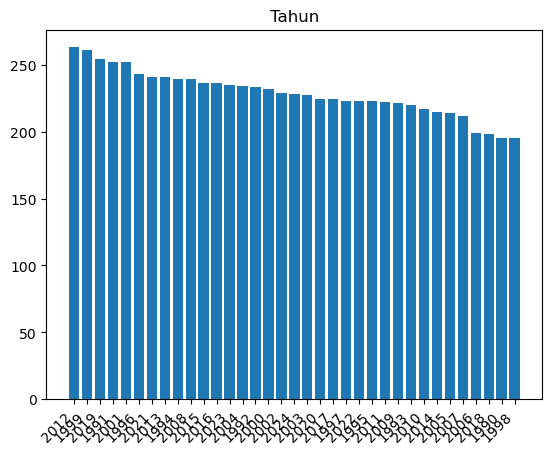

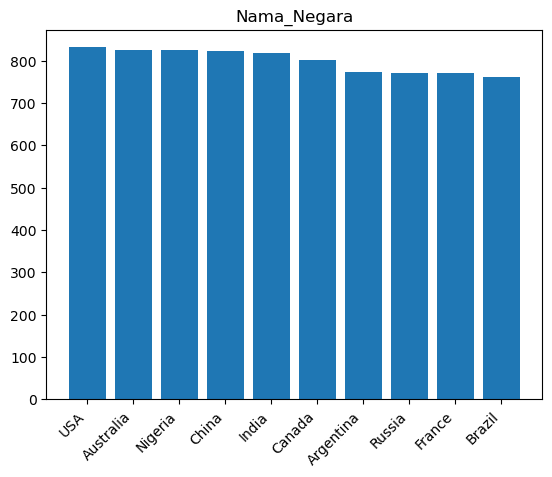

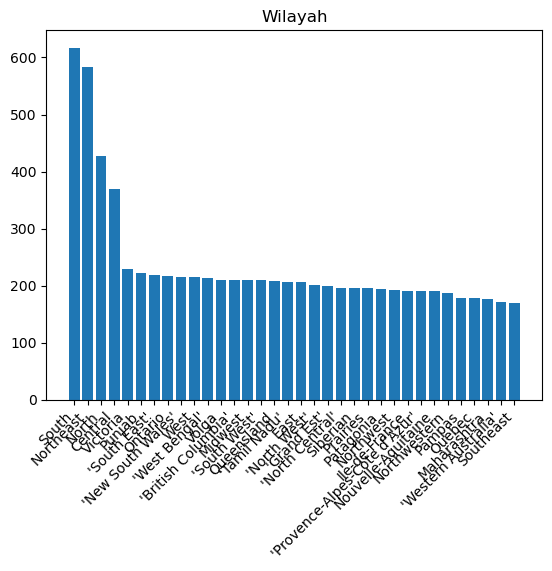

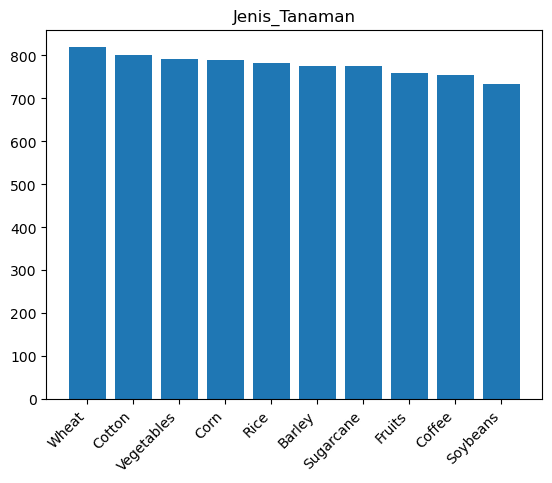

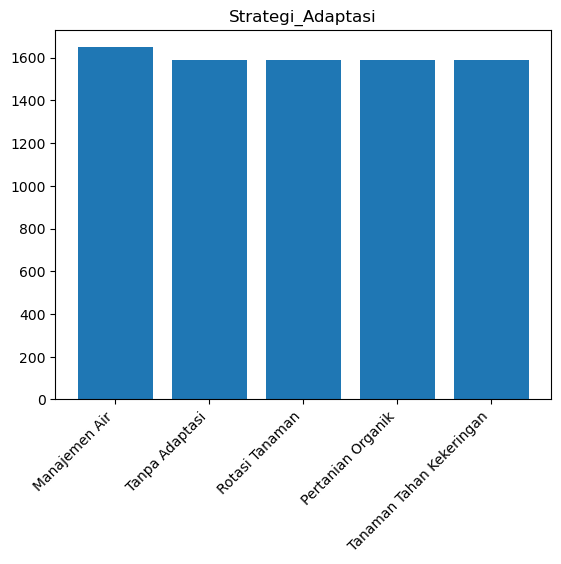

In [17]:
for col in df_obj_col.columns:
    category_counts = df_obj_col[col].value_counts()
    
    plt.bar(category_counts.index, category_counts.values)
    plt.title(f'{col}')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.show()

Dari hasil plot dan numeriknya, dapat dilihat hanya fitur wilayah yang sedikit imbalanced dan terdapat nilai nilai yang bukan wilayah saja tetapi ada provinsi, region, dan sebagainya.

Note :
1. Preprocessing kolom wilayah jika ada asosiasi dengan kolom lain
2. Hapus kolom wilayah karena datasetnya incosistensies

##### Bivariate Analysis

In [18]:
from scipy.stats import chi2_contingency

results = []
cols = df_obj_col.columns

for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        col1 = cols[i]
        col2 = cols[j]
        
        contingency_table = pd.crosstab(df_obj_col[col1], df_obj_col[col2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        results.append({
            'Var1': col1,
            'Var2': col2,
            'Chi2': chi2,
            'p-value': p,
            'dof': dof
        })

chi2_results = pd.DataFrame(results)

chi2_results.sort_values('p-value', inplace=True)
chi2_results

Var1               Var2          Chi2   p-value   dof
4    Nama_Negara            Wilayah  59959.408812  0.000000   297
3          Tahun  Strategi_Adaptasi    159.944049  0.078637   136
7        Wilayah      Jenis_Tanaman    318.289051  0.189251   297
9  Jenis_Tanaman  Strategi_Adaptasi     41.043547  0.258980    36
1          Tahun            Wilayah   1141.956053  0.332560  1122
0          Tahun        Nama_Negara    316.073356  0.333712   306
6    Nama_Negara  Strategi_Adaptasi     35.800511  0.478009    36
8        Wilayah  Strategi_Adaptasi    132.228875  0.478022   132
2          Tahun      Jenis_Tanaman    298.233056  0.613957   306
5    Nama_Negara      Jenis_Tanaman     74.208607  0.690224    81

Dari hasil chi squared test dapat dilihat bahwa untuk kolom Nama_Negara dan Wilayah terdapat asosiasi dimana nilai p-value < 0.05, sedangkan untuk kolom lainnya bersifat independen.

In [19]:
contingency = pd.crosstab(df['Nama_Negara'], df['Wilayah'])

chi2, p_value, dof, expected = chi2_contingency(contingency)
print(f"Min expected frequency: {expected.min()}")

n = contingency.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))
print(f"Cramer's V: {cramers_v:.3f}")

Min expected frequency: 16.076125
Cramer's V: 0.913


Dari hasil Cramers V dapat dilihat bahwa terdapat asosiasi yang kuat antara kolom Nama_Negara dengan Wilayah.

In [20]:
import scipy.stats as stats

target_col = "Suhu_Rata_Rata_C"  

for col in df_obj_col.columns:
    # Bagi data ke dalam grup berdasarkan kategori
    groups = [group[target_col].values for name, group in df.groupby(col)]
    
    # Pastikan semua grup punya minimal 2 data (ANOVA butuh >1 per grup)
    valid_groups = [g for g in groups if len(g) > 1]
    
    if len(valid_groups) > 1:
        f_stat, p_val = stats.f_oneway(*valid_groups)
        print(f"{col}: p-value = {p_val:.4f}")
    else:
        print(f"{col}: skipped (kategori terlalu sedikit atau data kosong)")


Tahun: p-value = 0.7647
Nama_Negara: p-value = 0.4199
Wilayah: p-value = 0.4362
Jenis_Tanaman: p-value = 0.0756
Strategi_Adaptasi: p-value = 0.1947


Dari hasil ANOVA, semua fitur objectnya memiliki nilai p-value > 0.05 artinya tidak ada asosiasi yang signifikan dengan target variable

### Preprocessing

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    df.drop(columns=['Suhu_Rata_Rata_C'], axis=1), 
    df['Suhu_Rata_Rata_C'], 
    test_size=0.2, 
    random_state=42
)

print('x_train shape:',x_train.shape)
print('x_val shape:',x_val.shape)
print('y_train shape:',y_train.shape)
print('y_val shape:',y_val.shape)

x_train shape: (6400, 13)
x_val shape: (1600, 13)
y_train shape: (6400,)
y_val shape: (1600,)


##### Handling Missing Value

In [22]:
# Numeric
num_cols_with_na = ['Akses_Irigasi', 'Hasil_Panen_Ton_per_HA', 'Total_Curah_Hujan_mm']

for col in num_cols_with_na:
    # Isi missing di train berdasarkan median per Tahun, Nama_Negara
    x_train[col] = x_train[col].fillna(
        x_train.groupby(['Tahun', 'Nama_Negara', 'Wilayah'])[col].transform('median')
    )

    # Isi missing di val berdasarkan median di train
    median_map = x_train.groupby(['Tahun', 'Nama_Negara', 'Wilayah'])[col].median()
    x_val[col] = x_val.apply(
        lambda row: row[col] if pd.notna(row[col]) 
        else median_map.get((row['Tahun'], row['Nama_Negara'], row['Wilayah']), np.nan),
        axis=1
    )


# Categorical
def get_mode(x):
    return x.mode().iloc[0] if not x.mode().empty else np.nan

x_train['Jenis_Tanaman'] = x_train['Jenis_Tanaman'].fillna(
    x_train.groupby(['Tahun', 'Nama_Negara', 'Wilayah'])['Jenis_Tanaman'].transform(get_mode)
)

mode_map = x_train.groupby(['Tahun', 'Nama_Negara', 'Wilayah'])['Jenis_Tanaman'].agg(get_mode)
x_val['Jenis_Tanaman'] = x_val.apply(
    lambda row: row['Jenis_Tanaman'] 
    if pd.notna(row['Jenis_Tanaman']) 
    else mode_map.get((row['Tahun'], row['Nama_Negara'], row['Wilayah']), np.nan),
    axis=1
)

# Hapus target dari list numeric columns
num_col.remove('Suhu_Rata_Rata_C')

In [23]:
print(x_train[num_col].isnull().sum())
print(x_val[num_col].isnull().sum())

Total_Curah_Hujan_mm              3
Emisi_CO2_JT_Ton                  0
Hasil_Panen_Ton_per_HA            2
Kejadian_Cuaca_Ekstrim            0
Akses_Irigasi                     1
Penggunaan_Pestisida_KG_per_HA    0
Penggunaan_Pupuk_KG_per_HA        0
Indeks_Kesehatan_Tanah            0
dtype: int64
Total_Curah_Hujan_mm              0
Emisi_CO2_JT_Ton                  0
Hasil_Panen_Ton_per_HA            0
Kejadian_Cuaca_Ekstrim            0
Akses_Irigasi                     0
Penggunaan_Pestisida_KG_per_HA    0
Penggunaan_Pupuk_KG_per_HA        0
Indeks_Kesehatan_Tanah            0
dtype: int64


In [24]:
print(x_train[obj_col].isnull().sum())
print(x_val[obj_col].isnull().sum())

Tahun                0
Nama_Negara          0
Wilayah              0
Jenis_Tanaman        2
Strategi_Adaptasi    0
dtype: int64
Tahun                0
Nama_Negara          0
Wilayah              0
Jenis_Tanaman        1
Strategi_Adaptasi    0
dtype: int64


In [25]:
from sklearn.impute import KNNImputer

# Sisa Null Value Numeric
imputer = KNNImputer(n_neighbors=5, weights='distance')

x_train[num_col] = imputer.fit_transform(x_train[num_col])
x_val[num_col] = imputer.transform(x_val[num_col])

# Sisa Null Value Categorical
global_mode = x_train['Jenis_Tanaman'].mode().iloc[0]
x_train['Jenis_Tanaman'] = x_train['Jenis_Tanaman'].fillna(global_mode)
x_val['Jenis_Tanaman'] = x_val['Jenis_Tanaman'].fillna(global_mode)

In [26]:
print(x_train[num_col].isnull().sum())
print(x_val[num_col].isnull().sum())

Total_Curah_Hujan_mm              0
Emisi_CO2_JT_Ton                  0
Hasil_Panen_Ton_per_HA            0
Kejadian_Cuaca_Ekstrim            0
Akses_Irigasi                     0
Penggunaan_Pestisida_KG_per_HA    0
Penggunaan_Pupuk_KG_per_HA        0
Indeks_Kesehatan_Tanah            0
dtype: int64
Total_Curah_Hujan_mm              0
Emisi_CO2_JT_Ton                  0
Hasil_Panen_Ton_per_HA            0
Kejadian_Cuaca_Ekstrim            0
Akses_Irigasi                     0
Penggunaan_Pestisida_KG_per_HA    0
Penggunaan_Pupuk_KG_per_HA        0
Indeks_Kesehatan_Tanah            0
dtype: int64


In [27]:
print(x_train[obj_col].isnull().sum())
print(x_val[obj_col].isnull().sum())

Tahun                0
Nama_Negara          0
Wilayah              0
Jenis_Tanaman        0
Strategi_Adaptasi    0
dtype: int64
Tahun                0
Nama_Negara          0
Wilayah              0
Jenis_Tanaman        0
Strategi_Adaptasi    0
dtype: int64


Data yang kita miliki terdistribusi uniform artinya setiap nilai yang ada di data tersebut mempunyai chance yang sama. sehingga pakai cara yang sederhana saja karena data uniform, Walaupun menggunakan metode yang kompleks cth KNN imputer data kita tidak ada pattern hasilnya juga akan uniform. dengan itu kami menggunakan median dan modus

---

# Pembuatan Fitur Bagian 1

Bagian ini kami melakukan eksplorasi feature2 yang dapat dibuat dan seberapa kuat korelasinya ke target variabel.

### Memuat Data & Inisiasi Pipeline

In [28]:
try:
    # 1. Muat data asli
    df = pd.read_csv('train.csv')

except FileNotFoundError:
    print("File 'train.csv' tidak ditemukan.")
except Exception as e:
    print(f"\nTerjadi error: {e}")

### Pembuatan Fitur 1: Polinomial, Rasio & Interaksi

In [29]:
print("Membuat fitur 1 (Rasio, Interaksi)...")

# Fitur Polinomial
df['Hasil_Panen_sq'] = df['Hasil_Panen_Ton_per_HA']**2
df['Emisi_CO2_sq'] = df['Emisi_CO2_JT_Ton']**2

# Fitur Rasio (tambahkan +1 untuk menghindari pembagian dengan nol)
df['Rasio_Panen_ke_Pupuk'] = df['Hasil_Panen_Ton_per_HA'] / (df['Penggunaan_Pupuk_KG_per_HA'] + 1)
df['Rasio_Panen_ke_Pestisida'] = df['Hasil_Panen_Ton_per_HA'] / (df['Penggunaan_Pestisida_KG_per_HA'] + 1)
df['Rasio_Panen_ke_Kesehatan'] = df['Hasil_Panen_Ton_per_HA'] / (df['Indeks_Kesehatan_Tanah'] + 1)
df['Rasio_CO2_ke_Panen'] = df['Emisi_CO2_JT_Ton'] / (df['Hasil_Panen_Ton_per_HA'] + 1)

# Fitur Interaksi
df['Pupuk_x_Pestisida'] = df['Penggunaan_Pupuk_KG_per_HA'] * df['Penggunaan_Pestisida_KG_per_HA']
df['Kesehatan_x_Irigasi'] = df['Indeks_Kesehatan_Tanah'] * df['Akses_Irigasi']

# Menghitung total input kimia
df['Total_Input_Kimia'] = df['Penggunaan_Pupuk_KG_per_HA'] + df['Penggunaan_Pestisida_KG_per_HA']

# Efisiensi panen terhadap total input kimia
df['Rasio_Panen_ke_Total_Kimia'] = df['Hasil_Panen_Ton_per_HA'] / (df['Total_Input_Kimia'] + 1)

print("Fitur 1 selesai dibuat.")

Membuat fitur 1 (Rasio, Interaksi)...
Fitur 1 selesai dibuat.


### Pembuatan Fitur 2: Fitur Deviasi

Logic: saat ini model hanya melihat Hasil_Panen_Ton_per_HA = 10, kita ingin model tahu apakah 10 itu banyak atau sedikit dibandingkan dengan rata-rata negaranya? Atau dibandingkan dengan rata-rata jenis tanamannya?

In [30]:
print("\nMembuat Fitur 2 (Deviasi)...")

# Tentukan fitur untuk dihitung deviasinya
features_to_deviate = [
    'Hasil_Panen_Ton_per_HA', 
    'Emisi_CO2_JT_Ton', 
    'Indeks_Kesehatan_Tanah',
    'Penggunaan_Pupuk_KG_per_HA',
    'Total_Curah_Hujan_mm'
]

# Tentukan grup kategorikal
cat_groups = ['Nama_Negara', 'Wilayah', 'Jenis_Tanaman']

for group_col in cat_groups:
    for feature_col in features_to_deviate:
        # 1. Hitung rata-rata fitur per grup
        # Cth: Rata2_Panen_per_Negara
        mean_feat_name = f'Rata2_{feature_col[:5]}_per_{group_col[:6]}'
        df[mean_feat_name] = df.groupby(group_col)[feature_col].transform('mean')
        
        # 2. Hitung fitur deviasi (Fitur - Rata2 Grup)
        # Cth: Deviasi_Panen_per_Negara
        dev_feat_name = f'Deviasi_{feature_col[:5]}_per_{group_col[:6]}'
        df[dev_feat_name] = df[feature_col] - df[mean_feat_name]
        
        print(f"Membuat: {dev_feat_name}")

print("Semua Fitur Deviasi selesai dibuat.")


Membuat Fitur 2 (Deviasi)...
Membuat: Deviasi_Hasil_per_Nama_N
Membuat: Deviasi_Emisi_per_Nama_N
Membuat: Deviasi_Indek_per_Nama_N
Membuat: Deviasi_Pengg_per_Nama_N
Membuat: Deviasi_Total_per_Nama_N
Membuat: Deviasi_Hasil_per_Wilaya
Membuat: Deviasi_Emisi_per_Wilaya
Membuat: Deviasi_Indek_per_Wilaya
Membuat: Deviasi_Pengg_per_Wilaya
Membuat: Deviasi_Total_per_Wilaya
Membuat: Deviasi_Hasil_per_Jenis_
Membuat: Deviasi_Emisi_per_Jenis_
Membuat: Deviasi_Indek_per_Jenis_
Membuat: Deviasi_Pengg_per_Jenis_
Membuat: Deviasi_Total_per_Jenis_
Semua Fitur Deviasi selesai dibuat.


Analisis Korelasi & Penyimpanan Hasil

In [31]:
# Kita tidak akan menggunakan semua fitur Rata2, jadi bisa didrop
# tapi kita simpan dulu untuk analisis korelasi

print("\nMenghitung korelasi dengan semua fitur baru...")
# Pilih semua kolom yang bertipe numerik
numeric_cols_final = df.select_dtypes(include=np.number).columns
corr_matrix_final = df[numeric_cols_final].corr()

print("\n=== Korelasi Fitur dengan 'Suhu_Rata_Rata_C' (v2) ===")
# Ambil korelasi terhadap target, urutkan dari yang terbesar
corr_with_target_final = corr_matrix_final['Suhu_Rata_Rata_C'].sort_values(ascending=False)
print(corr_with_target_final)

# Simpan dataset final yang siap untuk model
df_final = df.drop(columns=['ID']) # Drop ID karena tidak diperlukan untuk training
df_final.to_csv('train_with_golden_features_v2.csv', index=False)

print(f"\nDataset baru dengan {len(df_final.columns)} fitur telah disimpan ke 'train_with_golden_features_v2.csv'")


Menghitung korelasi dengan semua fitur baru...

=== Korelasi Fitur dengan 'Suhu_Rata_Rata_C' (v2) ===
Suhu_Rata_Rata_C                  1.000000
Deviasi_Hasil_per_Wilaya          0.269201
Deviasi_Hasil_per_Nama_N          0.268316
Hasil_Panen_Ton_per_HA            0.267940
Deviasi_Hasil_per_Jenis_          0.267219
Hasil_Panen_sq                    0.237767
Rasio_Panen_ke_Kesehatan          0.206091
Rasio_Panen_ke_Total_Kimia        0.107013
Rasio_Panen_ke_Pupuk              0.076592
Rasio_Panen_ke_Pestisida          0.057813
Rata2_Hasil_per_Jenis_            0.023571
ID                                0.021320
Rata2_Pengg_per_Jenis_            0.020218
Rata2_Emisi_per_Nama_N            0.016595
Rata2_Total_per_Nama_N            0.016303
Rata2_Emisi_per_Wilaya            0.008872
Total_Curah_Hujan_mm              0.008695
Deviasi_Total_per_Wilaya          0.008495
Deviasi_Total_per_Nama_N          0.007850
Deviasi_Total_per_Jenis_          0.007779
Rata2_Indek_per_Nama_N            0.0

# Pembuatan Fitur Bagian 2

In [32]:
try:
    # 1. Muat data asli
    df = pd.read_csv('train.csv')
    print("Memuat train.csv...")

    # --- Persiapan ---
    # Isi NaN sederhana agar perhitungan tidak gagal
    num_cols = df.select_dtypes(include=np.number).columns.drop(['ID', 'Suhu_Rata_Rata_C'])
    cat_cols = ['Nama_Negara', 'Wilayah', 'Jenis_Tanaman', 'Strategi_Adaptasi']
    
    print("Melakukan imputasi (Median/UNKNOWN)...")
    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())
    for col in cat_cols:
        df[col] = df[col].fillna('UNKNOWN')

    print("Memulai pembuatan Golden Features v3...")

except FileNotFoundError:
    print("\n--- PENTING ---")
    print("File 'train.csv' tidak ditemukan.")
except Exception as e:
    print(f"\nTerjadi kesalahan: {e}")

Memuat train.csv...
Melakukan imputasi (Median/UNKNOWN)...
Memulai pembuatan Golden Features v3...


### Strategi 1 & 2: Interaksi Kategorikal & Target Encoding

In [33]:
print("Membuat fitur Strategi 1 & 2 (Target Encoding & Interaksi)...")

# Buat fitur interaksi kategorikal
df['Cat_Negara_x_Tanaman'] = df['Nama_Negara'].astype(str) + '_' + df['Jenis_Tanaman'].astype(str)
df['Cat_Wilayah_x_Tanaman'] = df['Wilayah'].astype(str) + '_' + df['Jenis_Tanaman'].astype(str)

# Kumpulkan semua fitur kategorikal (asli + baru)
all_cat_cols = cat_cols + ['Cat_Negara_x_Tanaman', 'Cat_Wilayah_x_Tanaman']

# Terapkan Target Encoding
# (Peringatan: Ini bisa overfit! Gunakan encoding CV di pipeline asli Anda)
for col in all_cat_cols:
    feat_name = f'Target_Mean_{col[:15]}' # Batasi panjang nama
    print(f"Membuat: {feat_name}")
    
    # Hitung rata-rata target per kategori
    target_mean_map = df.groupby(col)['Suhu_Rata_Rata_C'].mean()
    
    # Map kembali ke dataframe
    df[feat_name] = df[col].map(target_mean_map)

Membuat fitur Strategi 1 & 2 (Target Encoding & Interaksi)...
Membuat: Target_Mean_Nama_Negara
Membuat: Target_Mean_Wilayah
Membuat: Target_Mean_Jenis_Tanaman
Membuat: Target_Mean_Strategi_Adapta
Membuat: Target_Mean_Cat_Negara_x_Ta
Membuat: Target_Mean_Cat_Wilayah_x_T


### Strategi 3: Fitur Z-Score

In [34]:
print("\nMembuat fitur Strategi 3 (Z-Score per Grup)...")
features_to_zscore = ['Hasil_Panen_Ton_per_HA', 'Emisi_CO2_JT_Ton', 'Penggunaan_Pupuk_KG_per_HA', 'Indeks_Kesehatan_Tanah']
group_cols = ['Nama_Negara', 'Wilayah', 'Jenis_Tanaman']

for group in group_cols:
    for feature in features_to_zscore:
        feat_name = f'ZScore_{feature[:5]}_per_{group[:6]}'
        print(f"Membuat: {feat_name}")
        
        # Hitung rata-rata dan std dev per grup
        group_stats = df.groupby(group)[feature].agg(['mean', 'std']).reset_index()
        group_stats.columns = [group, f'{feature}_mean', f'{feature}_std']
        
        # Gabungkan statistik kembali
        df = pd.merge(df, group_stats, on=group, how='left')
        
        # Hitung Z-Score: (Nilai - Rata2) / StdDev
        # Isi std dev 0 (jika grup hanya punya 1 anggota) dengan 1 agar tidak error
        df[f'{feature}_std'] = df[f'{feature}_std'].replace(0, 1)
        df[feat_name] = (df[feature] - df[f'{feature}_mean']) / df[f'{feature}_std']
        
        # Drop kolom bantu
        df = df.drop(columns=[f'{feature}_mean', f'{feature}_std'])
        
        # Isi NaN (jika std dev NaN) dengan 0
        df[feat_name] = df[feat_name].fillna(0)


Membuat fitur Strategi 3 (Z-Score per Grup)...
Membuat: ZScore_Hasil_per_Nama_N
Membuat: ZScore_Emisi_per_Nama_N
Membuat: ZScore_Pengg_per_Nama_N
Membuat: ZScore_Indek_per_Nama_N
Membuat: ZScore_Hasil_per_Wilaya
Membuat: ZScore_Emisi_per_Wilaya
Membuat: ZScore_Pengg_per_Wilaya
Membuat: ZScore_Indek_per_Wilaya
Membuat: ZScore_Hasil_per_Jenis_
Membuat: ZScore_Emisi_per_Jenis_
Membuat: ZScore_Pengg_per_Jenis_
Membuat: ZScore_Indek_per_Jenis_


### Strategi 4: Klasterisasi K-Means

In [35]:
print("\nMembuat fitur Strategi 4 (Klasterisasi KMeans)...")
# Fitur untuk klasterisasi (fitur praktik pertanian)
cluster_features = [
    'Total_Curah_Hujan_mm', 'Hasil_Panen_Ton_per_HA', 'Akses_Irigasi', 
    'Penggunaan_Pestisida_KG_per_HA', 'Penggunaan_Pupuk_KG_per_HA', 'Indeks_Kesehatan_Tanah'
]

# 1. Normalisasi data
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df[cluster_features])

# 2. Jalankan KMeans (misal, 5 klaster)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

# 3. Buat fitur baru
df['Cluster_ID'] = kmeans.fit_predict(df_cluster_scaled)
df['Cluster_ID'] = df['Cluster_ID'].astype('category')
print("Membuat: Cluster_ID (k=5)")


Membuat fitur Strategi 4 (Klasterisasi KMeans)...
Membuat: Cluster_ID (k=5)


### Strategi 5: Interaksi Polinomial & Rasio Kompleks

In [36]:
print("\nMembuat fitur Strategi 5 (Polinomial & Rasio Kompleks)...")

# Ambil fitur RF teratas
f1 = 'Hasil_Panen_Ton_per_HA'
f2 = 'Emisi_CO2_JT_Ton'
f3 = 'Penggunaan_Pestisida_KG_per_HA'
f4 = 'Penggunaan_Pupuk_KG_per_HA'
f5 = 'Indeks_Kesehatan_Tanah'

# Polinomial Pangkat 3
df['Panen_p3'] = df[f1]**3
df['Emisi_p3'] = df[f2]**3

# Interaksi 3 Fitur
df['Interaksi_Pupuk_Pest_Kesehatan'] = df[f3] * df[f4] * df[f5]

# Rasio Kompleks
df['Rasio_Panen_per_Total_Kimia'] = df[f1] / (df[f3] + df[f4] + 1)
df['Rasio_Emisi_per_Panen'] = df[f2] / (df[f1] + 1)
df['Rasio_Panen_per_Kesehatan_Pupuk'] = df[f1] / (df[f5] * df[f4] + 1)

print("Membuat: Polinomial^3, Interaksi 3-fitur, Rasio Kompleks")


Membuat fitur Strategi 5 (Polinomial & Rasio Kompleks)...
Membuat: Polinomial^3, Interaksi 3-fitur, Rasio Kompleks


### Analisis Final & Penyimpanan

In [37]:
# --- Analisis Korelasi Final ---
print("\nMenghitung korelasi dari SEMUA fitur baru...")

# Drop kolom non-numerik sebelum korelasi
numeric_df_v3 = df.select_dtypes(include=np.number)

# Hitung korelasi dengan target
corr_matrix_v3 = numeric_df_v3.corr()
corr_with_target = corr_matrix_v3['Suhu_Rata_Rata_C'].sort_values(ascending=False)

print("\n=== Korelasi 30 Teratas (Positif) dengan 'Suhu_Rata_Rata_C' ===")
print(corr_with_target.head(30))

print("\n=== Korelasi 30 Terbawah (Negatif) dengan 'Suhu_Rata_Rata_C' ===")
print(corr_with_target.tail(30))

# --- Simpan Hasil ---
df.to_csv('train_with_golden_features_v3.csv', index=False)
print(f"\nDataset baru dengan {df.shape[1]} total kolom telah disimpan ke 'train_with_golden_features_v3.csv'")


Menghitung korelasi dari SEMUA fitur baru...

=== Korelasi 30 Teratas (Positif) dengan 'Suhu_Rata_Rata_C' ===
Suhu_Rata_Rata_C                   1.000000
ZScore_Hasil_per_Wilaya            0.266514
ZScore_Hasil_per_Nama_N            0.265533
Hasil_Panen_Ton_per_HA             0.264972
ZScore_Hasil_per_Jenis_            0.264267
Target_Mean_Cat_Wilayah_x_T        0.219118
Panen_p3                           0.199593
Target_Mean_Cat_Negara_x_Ta        0.115321
Rasio_Panen_per_Total_Kimia        0.106721
Target_Mean_Wilayah                0.064856
Target_Mean_Jenis_Tanaman          0.045297
Target_Mean_Nama_Negara            0.033898
Target_Mean_Strategi_Adapta        0.027524
Rasio_Panen_per_Kesehatan_Pupuk    0.025694
ID                                 0.021320
Total_Curah_Hujan_mm               0.008603
Penggunaan_Pestisida_KG_per_HA     0.005331
Emisi_p3                           0.004400
ZScore_Emisi_per_Jenis_           -0.000861
Emisi_CO2_JT_Ton                  -0.001245
ZScore_Em

# COMBINE FEATURE FROM V2 & V3

In [38]:
try:
    # 1. Muat kedua dataset
    df_v2 = pd.read_csv('train_with_golden_features_v2.csv')
    df_v3 = pd.read_csv('train_with_golden_features_v3.csv')

    print(f"Shape V2: {df_v2.shape}")
    print(f"Shape V3: {df_v3.shape}")

    # 2. Periksa apakah jumlah baris cocok
    if df_v2.shape[0] != df_v3.shape[0]:
        print("\n--- ERROR ---")
        print("Jumlah baris di V2 dan V3 tidak sama. Tidak dapat menggabungkan.")
        print("Ini adalah daftar fitur dari masing-masing file:")
        
        print("\nFitur V2:")
        print(df_v2.columns.tolist())
        
        print("\nFitur V3:")
        print(df_v3.columns.tolist())

    else:
        print("\nJumlah baris cocok. Menggabungkan fitur...")

        # 3. Gabungkan Fitur
        # Ambil V3 sebagai basis (karena memiliki ID)
        cols_v3 = df_v3.columns.tolist()
        
        # Temukan fitur di V2 yang *tidak* ada di V3
        cols_v2_to_add = [col for col in df_v2.columns if col not in cols_v3]
        
        print(f"\nFitur unik di V2 yang akan ditambahkan ke V3:")
        if not cols_v2_to_add:
            print("Tidak ada fitur unik di V2. V3 sudah berisi semua fitur V2.")
        else:
            print(cols_v2_to_add)

        # Gabungkan V3 dengan fitur unik dari V2
        df_combined = pd.concat([df_v3, df_v2[cols_v2_to_add]], axis=1)

        print(f"\nShape dataset gabungan: {df_combined.shape}")

        # 4. Berikan Daftar Semua Fitur
        print("\n--- Daftar Semua Fitur Gabungan (v2 + v3) ---")
        
        # Tentukan kolom data asli (bukan fitur)
        original_cols = [
            'ID', 'Tahun', 'Nama_Negara', 'Wilayah', 'Jenis_Tanaman', 
            'Total_Curah_Hujan_mm', 'Emisi_CO2_JT_Ton', 'Hasil_Panen_Ton_per_HA', 
            'Kejadian_Cuaca_Ekstrim', 'Akses_Irigasi', 'Penggunaan_Pestisida_KG_per_HA', 
            'Penggunaan_Pupuk_KG_per_HA', 'Indeks_Kesehatan_Tanah', 'Strategi_Adaptasi', 
            'Suhu_Rata_Rata_C',
            # Ini adalah kolom bantu/kategorikal dari V3
            'Cat_Negara_x_Tanaman', 'Cat_Wilayah_x_Tanaman' 
        ]
        
        # Daftar fitur adalah semua kolom DI LUAR data asli
        all_features_list = [col for col in df_combined.columns if col not in original_cols]
        all_features_list.sort() # Urutkan secara alfabet
        
        print(all_features_list)
        print(f"\nTotal Fitur Unik Dibuat: {len(all_features_list)}")

        # Simpan file gabungan
        df_combined.to_csv('train_combined_all_features.csv', index=False)
        print("\nFile gabungan 'train_combined_all_features.csv' telah disimpan.")

except FileNotFoundError:
    print("Satu atau kedua file CSV tidak ditemukan.")
except Exception as e:
    print(f"\nTerjadi kesalahan: {e}")

Shape V2: (8000, 54)
Shape V3: (8000, 42)

Jumlah baris cocok. Menggabungkan fitur...

Fitur unik di V2 yang akan ditambahkan ke V3:
['Hasil_Panen_sq', 'Emisi_CO2_sq', 'Rasio_Panen_ke_Pupuk', 'Rasio_Panen_ke_Pestisida', 'Rasio_Panen_ke_Kesehatan', 'Rasio_CO2_ke_Panen', 'Pupuk_x_Pestisida', 'Kesehatan_x_Irigasi', 'Total_Input_Kimia', 'Rasio_Panen_ke_Total_Kimia', 'Rata2_Hasil_per_Nama_N', 'Deviasi_Hasil_per_Nama_N', 'Rata2_Emisi_per_Nama_N', 'Deviasi_Emisi_per_Nama_N', 'Rata2_Indek_per_Nama_N', 'Deviasi_Indek_per_Nama_N', 'Rata2_Pengg_per_Nama_N', 'Deviasi_Pengg_per_Nama_N', 'Rata2_Total_per_Nama_N', 'Deviasi_Total_per_Nama_N', 'Rata2_Hasil_per_Wilaya', 'Deviasi_Hasil_per_Wilaya', 'Rata2_Emisi_per_Wilaya', 'Deviasi_Emisi_per_Wilaya', 'Rata2_Indek_per_Wilaya', 'Deviasi_Indek_per_Wilaya', 'Rata2_Pengg_per_Wilaya', 'Deviasi_Pengg_per_Wilaya', 'Rata2_Total_per_Wilaya', 'Deviasi_Total_per_Wilaya', 'Rata2_Hasil_per_Jenis_', 'Deviasi_Hasil_per_Jenis_', 'Rata2_Emisi_per_Jenis_', 'Deviasi_Emisi_

In [39]:
# --- Hitung Korelasi ---
print("\nMenghitung korelasi untuk dataset gabungan...")

# 1. Pilih hanya kolom numerik untuk dihitung korelasinya
numeric_cols = df_combined.select_dtypes(include=np.number).columns

# 2. Buat matriks korelasi penuh
corr_matrix = df_combined[numeric_cols].corr()

# 3. Ambil korelasi untuk target 'Suhu_Rata_Rata_C' dan urutkan
corr_with_target = corr_matrix['Suhu_Rata_Rata_C'].sort_values(ascending=False)

# 4. Tampilkan 30 teratas
print("\n=== Korelasi Fitur Gabungan dengan 'Suhu_Rata_Rata_C' (TOP 30) ===")
print(corr_with_target.head(30))

# 5. Tampilkan 30 terbawah
print("\n=== Korelasi Fitur Gabungan dengan 'Suhu_Rata_Rata_C' (BOTTOM 30) ===")
print(corr_with_target.tail(30))


Menghitung korelasi untuk dataset gabungan...

=== Korelasi Fitur Gabungan dengan 'Suhu_Rata_Rata_C' (TOP 30) ===
Suhu_Rata_Rata_C                   1.000000
Deviasi_Hasil_per_Wilaya           0.269201
Deviasi_Hasil_per_Nama_N           0.268316
Deviasi_Hasil_per_Jenis_           0.267219
ZScore_Hasil_per_Wilaya            0.266514
ZScore_Hasil_per_Nama_N            0.265533
Hasil_Panen_Ton_per_HA             0.264972
ZScore_Hasil_per_Jenis_            0.264267
Hasil_Panen_sq                     0.237767
Target_Mean_Cat_Wilayah_x_T        0.219118
Rasio_Panen_ke_Kesehatan           0.206091
Panen_p3                           0.199593
Target_Mean_Cat_Negara_x_Ta        0.115321
Rasio_Panen_ke_Total_Kimia         0.107013
Rasio_Panen_per_Total_Kimia        0.106721
Rasio_Panen_ke_Pupuk               0.076592
Target_Mean_Wilayah                0.064856
Rasio_Panen_ke_Pestisida           0.057813
Target_Mean_Jenis_Tanaman          0.045297
Target_Mean_Nama_Negara            0.033898
Targe

# FEATURE SELECTION

## PENJELASAN SELEKSI FITUR 

---

### 1. Z-SCORE > DEVIASI

* Anda buat 2 fitur mirip: `Deviasi_...` dan `ZScore_...`.
* **`ZScore_...` lebih jago** karena pakai standar deviasi (menghitung "seberapa aneh" nilainya).
* **BUANG:** `cols_deviasi` (kalah jago) dan `cols_rata2` (cuma bantu `deviasi`).

---

### 2. FITUR ASLI DIGANTI 

* Kolom string asli sudah **tidak berguna** buat model.
* **BUANG:** `Nama_Negara`, `Wilayah`, `Jenis_Tanaman`, `Strategi_Adaptasi`.
* **KENAPA:** Info mereka sudah "diserap" ke fitur angka yang baru, seperti `Target_Mean_...` dan `ZScore_...`.

---

### 3. FITUR BANTU

* Anda buat kolom string gabungan (`Cat_Negara_x_Tanaman`).
* **BUANG:** `Cat_Negara_x_Tanaman`, `Cat_Wilayah_x_Tanaman`.
* **KENAPA:** Kolom ini cuma "kunci" sementara. Setelah dipakai untuk buat `Target_Mean_...`, kuncinya dibuang.

---

### 4. FITUR TIDAK EFEKTIF / REDUNDAN

* **`ID`:** Dibuang. Cuma nomor urut, **tidak ada pola**.
* **`Hasil_Panen_Ton_per_HA`:** Dibuang. Informasinya **sudah dipecah** ke banyak fitur baru (`Panen_p3`, `Rasio_Panen_...`, `ZScore_Hasil_...`). Jadi **redundan** (dobel).

In [40]:
import os

# Tentukan nama file input dan output
INPUT_FILE = 'train_combined_all_features.csv'
OUTPUT_FILE = 'train_FINAL_SELECTED_FEATURES.csv'

try:
    # 1. Muat dataset gabungan lengkap
    if not os.path.exists(INPUT_FILE):
        print(f"--- ERROR ---")
        print(f"File '{INPUT_FILE}' tidak ditemukan.")
    else:
        df_combined = pd.read_csv(INPUT_FILE)
        print(f"Dataset gabungan dimuat. Shape awal: {df_combined.shape}")
        
        # Dapatkan semua kolom Rata2_...
        cols_rata2 = [col for col in df_combined.columns if 'Rata2_' in col]
        print(f"Menemukan {len(cols_rata2)} kolom 'Rata2_' untuk dibuang.")
        
        # Dapatkan semua kolom Deviasi_... (karena kita memilih ZScore yang lebih superior)
        cols_deviasi = [col for col in df_combined.columns if 'Deviasi_' in col]
        print(f"Menemukan {len(cols_deviasi)} kolom 'Deviasi_' untuk dibuang.")
        
        # Kolom string asli (diganti Target Encoding)
        cols_string_asli = ['Nama_Negara', 'Wilayah', 'Jenis_Tanaman', 'Strategi_Adaptasi']
        
        # Kolom string bentukan (sudah dipakai untuk Target Encoding)
        cols_string_bentukan = ['Cat_Negara_x_Tanaman', 'Cat_Wilayah_x_Tanaman']
        
        # Kolom asli yang diganti (Hasil_Panen) dan ID
        cols_lain_dibuang = ['ID', 'Hasil_Panen_Ton_per_HA']
        
        # Gabungkan semua kolom yang akan dibuang
        features_to_drop = (
            cols_rata2 + 
            cols_deviasi + 
            cols_string_asli + 
            cols_string_bentukan + 
            cols_lain_dibuang
        )
        
        # Hapus duplikat dari daftar buang, dan pastikan kolomnya ada di df
        features_to_drop_final = list(set([col for col in features_to_drop if col in df_combined.columns]))
        
        print(f"\nTotal kolom unik yang akan dibuang: {len(features_to_drop_final)}")

        # 3. Buat dataset final
        df_final_selected = df_combined.drop(columns=features_to_drop_final)
        
        print(f"\nShape dataset setelah seleksi: {df_final_selected.shape}")

        # 4. Tampilkan daftar fitur final 
        final_features_list = df_final_selected.columns.tolist()
        
        # Pisahkan target
        target_column = 'Suhu_Rata_Rata_C'
        if target_column in final_features_list:
            final_features_list.remove(target_column)
            
        print("\n--- FITUR FINAL YANG TERPILIH UNTUK MODEL ---")
        print(final_features_list)
        print(f"\nTotal fitur terpilih: {len(final_features_list)}")
        
        # 5. Simpan dataset final
        df_final_selected.to_csv(OUTPUT_FILE, index=False)
        print(f"\nDataset final siap untuk pemodelan telah disimpan ke '{OUTPUT_FILE}'")

except Exception as e:
    print(f"\nTerjadi kesalahan: {e}")

Dataset gabungan dimuat. Shape awal: (8000, 82)
Menemukan 15 kolom 'Rata2_' untuk dibuang.
Menemukan 15 kolom 'Deviasi_' untuk dibuang.

Total kolom unik yang akan dibuang: 38

Shape dataset setelah seleksi: (8000, 44)

--- FITUR FINAL YANG TERPILIH UNTUK MODEL ---
['Tahun', 'Total_Curah_Hujan_mm', 'Emisi_CO2_JT_Ton', 'Kejadian_Cuaca_Ekstrim', 'Akses_Irigasi', 'Penggunaan_Pestisida_KG_per_HA', 'Penggunaan_Pupuk_KG_per_HA', 'Indeks_Kesehatan_Tanah', 'Target_Mean_Nama_Negara', 'Target_Mean_Wilayah', 'Target_Mean_Jenis_Tanaman', 'Target_Mean_Strategi_Adapta', 'Target_Mean_Cat_Negara_x_Ta', 'Target_Mean_Cat_Wilayah_x_T', 'ZScore_Hasil_per_Nama_N', 'ZScore_Emisi_per_Nama_N', 'ZScore_Pengg_per_Nama_N', 'ZScore_Indek_per_Nama_N', 'ZScore_Hasil_per_Wilaya', 'ZScore_Emisi_per_Wilaya', 'ZScore_Pengg_per_Wilaya', 'ZScore_Indek_per_Wilaya', 'ZScore_Hasil_per_Jenis_', 'ZScore_Emisi_per_Jenis_', 'ZScore_Pengg_per_Jenis_', 'ZScore_Indek_per_Jenis_', 'Cluster_ID', 'Panen_p3', 'Emisi_p3', 'Interaksi_Pu

---

# MODEL ENGINEERING AND FINDING BEST PARAM USING OPTUNA

# Optimasi Hyperparameter XGBoost dengan Optuna

### Mengapa Pendekatan Ini?

1.  **Model (XGBoost):** Kita pilih XGBoost karena sangat kuat untuk data tabular (data kita), bisa menangani nilai *missing* secara internal, dan (yang paling penting) bisa **secara native menangani fitur kategorikal** (`enable_categorical=True`). Ini membuat *preprocessing* kita lebih sederhana.

2.  **Metrik (MAPE):** *Goal* kita adalah meminimalkan MAPE (*Mean Absolute Percentage Error*). Namun, MAPE standar gampang "meledak" (error) jika nilai aslinya (`y_true`) adalah nol. Oleh karena itu, kita membuat **fungsi objective kustom** (`pseudo_huber_mape_obj`) yang merupakan versi "smooth" dari MAPE (lebih stabil).

3.  **Tuning (Optuna):** Daripada `GridSearch` (mencoba semua kombinasi) atau `RandomSearch` (mencoba acak) yang "bodoh", kita pakai **Optuna**. Optuna menggunakan *Bayesian Optimization*, yang artinya dia "belajar" dari setiap *trial* (percobaan) untuk fokus mencari parameter di area yang menjanjikan. Ini jauh lebih efisien.

4.  **Validasi (K-Fold CV):** Kita tidak bisa *tuning* parameter hanya dengan satu *validation set*. Itu akan *overfit* ke *validation set* tersebut. Kita pakai **K-Fold Cross-Validation** (N_SPLITS=5) untuk mendapatkan skor OOF (*Out-of-Fold*) yang lebih stabil dan bisa dipercaya.

5.  **Strategi (Leak-Free FE):** Ini adalah bagian paling kompleks. Fitur seperti **K-Means** dan **Z-Score** harus dibuat *di dalam* *loop* CV. Jika kita membuatnya di data penuh (8k data) sebelum CV, model di *fold* 1 akan "melihat" informasi dari *fold* 2-5. Ini disebut **Data Leakage**. Dengan membuatnya di dalam *loop* (fit HANYA di *train_fold*), kita mencegah kebocoran dan mendapatkan skor validasi yang jujur.

---

### Impor Library

In [41]:
import pandas as pd
import numpy as np
import xgboost as xgb
import optuna
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.cluster import KMeans
import gc
from warnings import filterwarnings

filterwarnings('ignore')

### Fungsi Objective & Evaluasi Kustom

eval_mape: Hanya untuk evaluasi (menghitung skor MAPE).

pseudo_huber_mape_obj: Ini adalah versi differentiable (bisa diturunkan) dari MAPE yang kita sebut "Pseudo-Huber MAPE". Ini yang dipakai XGBoost untuk training.

In [42]:
# --- 1. Fungsi Objective & Evaluasi ---

def pseudo_huber_mape_obj(y_pred, dtrain):
    """
    Objective kustom 'Pseudo-Huber' untuk MAPE.
    Lebih stabil daripada MAPE standar.
    """
    y_true = dtrain.get_label()
    delta = 1.0; epsilon = 1e-9 # epsilon biar gak bagi dengan nol
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    
    # Pastikan y_true tidak nol
    y_true_safe = np.maximum(np.abs(y_true), epsilon)
    
    residual_pct = (y_true - y_pred) / y_true_safe
    scale = 1.0 / y_true_safe
    
    # Hitung gradien (turunan pertama)
    grad = -scale * (residual_pct * delta) / np.sqrt(delta**2 + residual_pct**2)
    
    # Hitung hessian (turunan kedua)
    hess = (scale**2) * (delta**2) / ((delta**2 + residual_pct**2)**1.5)
    hess = np.maximum(hess, 1e-9) # Jaga-jaga hessian jangan kekecilan
    
    return grad, hess

def eval_mape(y_pred, dtrain):
    """Fungsi evaluasi MAPE standar, tapi aman dari 'divide by zero'."""
    y_true = dtrain.get_label()
    epsilon = 1e-9
    err = np.abs(y_true - y_pred) / np.maximum(np.abs(y_true), epsilon)
    return 'MAPE', np.mean(err)

### Fungsi Helper

Dua fungsi bantu:

reduce_mem_usage: Menghemat RAM dengan mengubah tipe data (misal: float64 jadi float32).

create_zscore_features: Fungsi feature engineering untuk Z-Score. Dibuat leak-free: statistik (mean, std) dihitung di X_train, lalu dipakai untuk transform X_val dan X_test.

In [3]:
# --- 2. Fungsi Helper (Utilities) ---

def reduce_mem_usage(df):
    """Fungsi buat hemat RAM. Mengubah tipe data ke yg lebih kecil."""
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object and not pd.api.types.is_categorical_dtype(col_type):
            c_min = df[col].min(); c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    return df

def create_zscore_features(X_train, X_val, X_test, group_cols, features_to_zscore):
    """
    Membuat fitur Z-Score secara leak-free.
    Statistik (mean, std) di-fit HANYA di X_train.
    Lalu dipakai untuk transform X_val dan X_test.
    """
    for group_col in group_cols:
        for feature in features_to_zscore:
            new_feat_name = f'ZScore_{feature[:5]}_per_{group_col[:6]}'
            
            # 1. Hitung statistik HANYA di data train
            stats = X_train.groupby(group_col)[feature].agg(['mean', 'std'])
            stats = stats.fillna(0); stats['std'] = stats['std'].replace(0, 1) # Hindari std=0
            
            # 2. Merge statistik ke train, val, dan test
            X_train = X_train.merge(stats, on=group_col, how='left')
            X_val = X_val.merge(stats, on=group_col, how='left')
            X_test = X_test.merge(stats, on=group_col, how='left')
            
            # 3. Handle missing groups (jika ada grup di val/test yg gak ada di train)
            global_mean = X_train[feature].mean()
            global_std = X_train[feature].std()
            X_val['mean'] = X_val['mean'].fillna(global_mean)
            X_val['std'] = X_val['std'].fillna(global_std)
            X_test['mean'] = X_test['mean'].fillna(global_mean)
            X_test['std'] = X_test['std'].fillna(global_std)

            # 4. Hitung Z-Score
            X_train[new_feat_name] = (X_train[feature] - X_train['mean']) / X_train['std']
            X_val[new_feat_name] = (X_val[feature] - X_val['mean']) / X_val['std']
            X_test[new_feat_name] = (X_test[feature] - X_test['mean']) / X_test['std']
            
            # 5. Drop kolom bantu
            X_train = X_train.drop(columns=['mean', 'std'])
            X_val = X_val.drop(columns=['mean', 'std'])
            X_test = X_test.drop(columns=['mean', 'std'])
            
    return X_train, X_val, X_test

### Memuat Data & Persiapan Target

In [44]:
# --- 3. Memuat Data ---
print("\n--- Memuat Data ---")
try:
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')
    print("File train.csv dan test.csv berhasil dimuat.")
except FileNotFoundError:
    print("ERROR: File tidak ditemukan.")
    exit()

TARGET = 'Suhu_Rata_Rata_C'
test_ids = test_df['ID']
y_train = train_df[TARGET] # Target asli

# Siapkan 'y_train_safe' untuk evaluasi MAPE
epsilon_safe = 1e-6
y_train_safe = np.where(y_train == 0, epsilon_safe, y_train) 
print(f"Target asli dimuat. Target 'safe' (untuk MAPE) dibuat dengan epsilon={epsilon_safe}.")


--- Memuat Data ---
File train.csv dan test.csv berhasil dimuat.
Target asli dimuat. Target 'safe' (untuk MAPE) dibuat dengan epsilon=1e-06.


### Feature Engineering Universal

ini adalah feature engineering (FE) yang sudah kita pilih dan seleksi sebelumnya, tapi disini kita akan buat ulang agar lebih rapih.

kita lakukan FE pada data gabungan (train + test). Ini aman dari leakage karena tidak menggunakan informasi dari TARGET sama sekali.

Kita melakukan:

- Imputasi: Mengisi nilai missing (NaN) dengan median (untuk angka) atau modus (untuk kategori).

- Golden Features: Membuat fitur baru (polinomial, rasio, interaksi) yang kita yakini kuat.

- Encoding Awal: LabelEncoder untuk fitur kategori dasar.

- Reduksi Memori: Memanggil fungsi reduce_mem_usage.

In [45]:
# --- 4. Mempersiapkan FE Universal (Imputasi, Poly, Encoding Awal) ---
print("\n--- Mempersiapkan FE Universal (Imputasi, Poly, Encoding Awal) ---")

train_df_copy = train_df.copy(); test_df_copy = test_df.copy()

# Gabungkan train & test untuk FE yg konsisten
combined_df = pd.concat([train_df.drop([TARGET, 'ID'], axis=1), test_df.drop('ID', axis=1)], ignore_index=True)

# Imputasi sederhana
num_cols_with_na = ['Total_Curah_Hujan_mm', 'Hasil_Panen_Ton_per_HA', 'Akses_Irigasi']
cat_cols_with_na = ['Jenis_Tanaman']
for col in num_cols_with_na: 
    combined_df[col] = combined_df[col].fillna(combined_df[col].median())
for col in cat_cols_with_na: 
    combined_df[col] = combined_df[col].fillna(combined_df[col].mode()[0]) # Pakai modus

print("Membuat Golden Features (Rasio, Polinomial, Interaksi)...")
important_features = ['Hasil_Panen_Ton_per_HA','Emisi_CO2_JT_Ton','Penggunaan_Pestisida_KG_per_HA','Penggunaan_Pupuk_KG_per_HA','Indeks_Kesehatan_Tanah']

# Polinomial
for col in important_features:
    combined_df[f'{col}_sq'] = combined_df[col]**2
    combined_df[f'{col}_cub'] = combined_df[col]**3

# Interaksi
combined_df['Hasil_x_Emisi'] = combined_df['Hasil_Panen_Ton_per_HA'] * combined_df['Emisi_CO2_JT_Ton']
combined_df['Pestisida_x_Pupuk'] = combined_df['Penggunaan_Pestisida_KG_per_HA'] * combined_df['Penggunaan_Pupuk_KG_per_HA']
combined_df['Hasil_x_Kesehatan_Tanah'] = combined_df['Hasil_Panen_Ton_per_HA'] * combined_df['Indeks_Kesehatan_Tanah']
combined_df['Kesehatan_x_Irigasi'] = combined_df['Indeks_Kesehatan_Tanah'] * combined_df['Akses_Irigasi']
combined_df['Interaksi_Pupuk_Pest_Kesehatan'] = combined_df['Penggunaan_Pupuk_KG_per_HA'] * combined_df['Penggunaan_Pestisida_KG_per_HA'] * combined_df['Indeks_Kesehatan_Tanah']

# Rasio
epsilon = 1e-6 # Epsilon biar gak bagi nol
combined_df['Rasio_Panen_ke_Pupuk'] = combined_df['Hasil_Panen_Ton_per_HA'] / (combined_df['Penggunaan_Pupuk_KG_per_HA'] + epsilon)
combined_df['Rasio_Panen_ke_Pestisida'] = combined_df['Hasil_Panen_Ton_per_HA'] / (combined_df['Penggunaan_Pestisida_KG_per_HA'] + epsilon)
combined_df['Rasio_Panen_ke_Kesehatan'] = combined_df['Hasil_Panen_Ton_per_HA'] / (combined_df['Indeks_Kesehatan_Tanah'] + epsilon)
combined_df['Rasio_CO2_ke_Panen'] = combined_df['Emisi_CO2_JT_Ton'] / (combined_df['Hasil_Panen_Ton_per_HA'] + epsilon)
combined_df['Total_Input_Kimia'] = combined_df['Penggunaan_Pupuk_KG_per_HA'] + combined_df['Penggunaan_Pestisida_KG_per_HA']
combined_df['Rasio_Panen_ke_Total_Kimi'] = combined_df['Hasil_Panen_Ton_per_HA'] / (combined_df['Total_Input_Kimia'] + epsilon)

# Encoding awal
categorical_features = ['Nama_Negara', 'Jenis_Tanaman', 'Strategi_Adaptasi']
le = LabelEncoder()
for col in categorical_features: 
    combined_df[col] = le.fit_transform(combined_df[col].astype(str))

# Simpan daftar fitur numerik buat K-Means nanti
numeric_features_for_cluster = ['Tahun','Total_Curah_Hujan_mm','Emisi_CO2_JT_Ton','Hasil_Panen_Ton_per_HA','Kejadian_Cuaca_Ekstrim','Akses_Irigasi','Penggunaan_Pestisida_KG_per_HA','Penggunaan_Pupuk_KG_per_HA','Indeks_Kesehatan_Tanah']

# Hemat memori
combined_df = reduce_mem_usage(combined_df)

print(f"Total fitur yang dibuat di combined_df: {len(combined_df.columns)}")


--- Mempersiapkan FE Universal (Imputasi, Poly, Encoding Awal) ---
Membuat Golden Features (Rasio, Polinomial, Interaksi)...
Total fitur yang dibuat di combined_df: 34


### Pisahkan Data

Kita pisahkan kembali combined_df menjadi X_base (untuk training) dan X_test_base (untuk submission). Ini adalah data "master" kita sebelum feature engineering di dalam loop (K-Means & Z-Score).

Poin penting di sini adalah mengubah semua kolom kategorikal (termasuk Wilayah yang baru di-encode) menjadi tipe data category.

In [46]:
# --- 5. Pisahkan Data (Persiapan 'Base') ---

# Pisahkan kembali ke train dan test
X_base = combined_df.iloc[:len(train_df_copy)].copy()
X_test_base = combined_df.iloc[len(train_df_copy):].copy()

# Encode 'Wilayah' secara terpisah (karena tipe datanya object)
X_base['Wilayah'] = LabelEncoder().fit_transform(X_base['Wilayah'])
X_test_base['Wilayah'] = LabelEncoder().fit_transform(X_test_base['Wilayah'])

# Kumpulkan SEMUA kolom kategori
cat_cols_all = categorical_features + ['Wilayah']

# PENTING: Ubah tipe data kolom kategori ke 'category'
# Ini akan memberi tahu XGBoost (via enable_categorical=True)
# untuk menangani fitur ini secara internal.
for col in cat_cols_all:
    X_base[col] = X_base[col].astype('category')
    X_test_base[col] = X_test_base[col].astype('category')

print("Data latih dan tes awal telah disiapkan (tanpa Cluster_ID & ZScore).")

# Bersihkan memori
del train_df, test_df, combined_df, train_df_copy, test_df_copy
gc.collect()

Data latih dan tes awal telah disiapkan (tanpa Cluster_ID & ZScore).


31230

### Fungsi Objective Optuna

Kita membungkus seluruh proses K-Fold CV di dalam satu fungsi objective(trial). Optuna akan memanggil fungsi ini berulang kali (N_TRIALS kali).

Setiap kali dipanggil:

- trial akan menyarankan satu set hyperparameter baru.

- Kita menjalankan K-Fold CV (5 fold) dengan parameter tersebut.

- Di dalam loop CV, kita membuat fitur K-Means dan Z-Score secara leak-free (fit di train-fold, transform di val-fold).

- Kita melatih 5 model XGBoost.

- Kita menghitung skor OOF MAPE dari 5 fold tersebut.

- Kita mengembalikan (return) skor OOF MAPE ke Optuna.

In [47]:
# --- 6. Definisikan Fungsi Objective Optuna ---

def objective(trial):
    """
    Fungsi ini yg akan dipanggil Optuna berulang-ulang.
    Setiap 'trial' adalah 1x menjalankan K-Fold CV lengkap.
    """
    
    print(f"\n--- Memulai Trial {trial.number} ---")
    
    # --- 1. Tentukan Search Space (Rentang Parameter) ---
    # Ini "resep" yg mau dicari Optuna
    params_xgb = {
        'n_estimators': 10000, # Bikin aja 10000, nanti di-stop sama early stopping
        'learning_rate': trial.suggest_float('learning_rate', 0.0008, 0.003, log=True),
        'max_depth': trial.suggest_int('max_depth', 1, 3), # Jaga agar tetap 'shallow' (1-3) biar gak overfit
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-2, 10.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-2, 10.0, log=True),
        'n_jobs': -1, 'random_state': 42,
        'tree_method': 'hist', 'enable_categorical': True, # WAJIB! Biar tipe 'category' dibaca
    }
    
    N_SPLITS = 5
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

    oof_leak_free = np.zeros(X_base.shape[0])
    test_preds_leak_free = np.zeros(X_test_base.shape[0])
    n_clusters = 10 # Kita tetapkan 10 cluster untuk K-Means

    # Definisikan fitur yg mau di-ZScore
    features_to_zscore = ['Hasil_Panen_Ton_per_HA', 'Emisi_CO2_JT_Ton', 
                          'Penggunaan_Pupuk_KG_per_HA', 'Penggunaan_Pestisida_KG_per_HA',
                          'Indeks_Kesehatan_Tanah', 'Total_Curah_Hujan_mm']
    zscore_group_cols = ['Wilayah', 'Nama_Negara', 'Jenis_Tanaman']

    # --- 2. Persiapan X_test untuk trial ini (HANYA SEKALI) ---
    # Kita perlu siapkan X_test_trial dengan K-Means & ZScore
    # Statistiknya di-fit dari X_base (8k data)
    
    X_test_trial = X_test_base.copy()
    
    # Fit global scaler/kmeans HANYA di 8k data train
    scaler_global = StandardScaler()
    X_scaled_global = scaler_global.fit_transform(X_base[numeric_features_for_cluster])
    kmeans_global = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_global.fit(X_scaled_global)
    # Transform X_test
    X_test_scaled = scaler_global.transform(X_test_trial[numeric_features_for_cluster])
    X_test_trial['Cluster_ID'] = kmeans_global.predict(X_test_scaled)
    X_test_trial['Cluster_ID'] = X_test_trial['Cluster_ID'].astype('category')

    # Fit ZScore global (pakai 8k train) buat X_test
    _, _, X_test_trial = create_zscore_features(X_base.copy(), X_test_trial.copy(), X_test_trial.copy(), 
                                                zscore_group_cols, features_to_zscore)
    
    # --- 3. Jalankan K-Fold CV ---
    for fold, (train_index, val_index) in enumerate(kf.split(X_base, y_train)):
        
        # Ambil data untuk fold ini (masih 'base', belum di-FE)
        X_train_fold, X_val_fold = X_base.iloc[train_index].copy(), X_base.iloc[val_index].copy()
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        
        # --- FE LEAK-FREE: K-Means (Fit di train fold, transform di val fold) ---
        scaler_fold = StandardScaler()
        X_train_fold_scaled = scaler_fold.fit_transform(X_train_fold[numeric_features_for_cluster])
        X_val_fold_scaled = scaler_fold.transform(X_val_fold[numeric_features_for_cluster])
        
        kmeans_fold = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        kmeans_fold.fit(X_train_fold_scaled) # Fit HANYA di train_fold
        
        X_train_fold['Cluster_ID'] = kmeans_fold.predict(X_train_fold_scaled)
        X_train_fold['Cluster_ID'] = X_train_fold['Cluster_ID'].astype('category')
        
        X_val_fold['Cluster_ID'] = kmeans_fold.predict(X_val_fold_scaled) # Transform val_fold
        X_val_fold['Cluster_ID'] = X_val_fold['Cluster_ID'].astype('category')
        
        
        # --- FE LEAK-FREE: Z-Score (Fit di train fold, transform di val fold) ---
        X_train_fold, X_val_fold, _ = create_zscore_features(X_train_fold, X_val_fold, X_test_trial, 
                                                             zscore_group_cols, features_to_zscore)
        
        # Siapkan DMatrix (format data khusus XGBoost)
        dtrain = xgb.DMatrix(X_train_fold, label=y_train_fold, enable_categorical=True)
        dval = xgb.DMatrix(X_val_fold, label=y_val_fold, enable_categorical=True)
        watchlist = [(dtrain, 'train'), (dval, 'eval')]

        # --- Latih Model ---
        model = xgb.train(
            params_xgb,
            dtrain,
            num_boost_round=params_xgb['n_estimators'],
            evals=watchlist,
            obj=pseudo_huber_mape_obj, # Objective kustom
            custom_metric=eval_mape,   # Metrik evaluasi kustom
            maximize=False,            # Kita mau 'minimize' MAPE
            early_stopping_rounds=10000, # Pakai 10000 biar aman, walau biasanya 1000-2000 udah cukup.
            verbose_eval=False # Matikan log biar gak menuhin output
        )
        
        # Simpan prediksi OOF
        val_preds = model.predict(dval, iteration_range=(0, model.best_iteration))
        oof_leak_free[val_index] = val_preds
        
        # Simpan prediksi Test
        dtest = xgb.DMatrix(X_test_trial, enable_categorical=True)
        test_preds_leak_free += model.predict(dtest, iteration_range=(0, model.best_iteration)) / N_SPLITS
        
        gc.collect() # Bersihkan memori setiap selesai fold

    # --- 4. Hitung Skor OOF Final & Kembalikan ---
    # Setelah 5 fold selesai, hitung MAPE totalnya
    mape_leak_free = mean_absolute_percentage_error(y_train_safe, oof_leak_free)
    print(f"Trial {trial.number} selesai. OOF MAPE: {mape_leak_free:.8f}")
    
    # Simpan hasil prediksi test dari trial ini, buat dipakai nanti
    trial.set_user_attr("test_predictions", test_preds_leak_free)
    
    # Kembalikan skor MAPE (ini yg akan diminimalkan Optuna)
    return mape_leak_free

### Jalankan Studi Optuna

In [ ]:
# --- 7. Jalankan Studi Optuna ---
print("\n--- TAHAP 2: Memulai Studi Optuna ---")
# n_trials=50 berarti menjalankan 50 * 5 = 250 pelatihan model.
N_TRIALS = 50 

study = optuna.create_study(direction='minimize') # meminimalkan MAPE
study.optimize(objective, n_trials=N_TRIALS, show_progress_bar=True)



--- Memuat Data ---
File train.csv dan test.csv berhasil dimuat.
Target aman berhasil dibuat.

--- Mempersiapkan FE Universal (Imputasi, Poly, Encoding Awal) ---
Membuat Golden Features (Rasio, Polinomial, Interaksi)...
Total fitur yang dibuat di combined_df: 34
Data latih dan tes awal telah disiapkan (tanpa Cluster_ID & ZScore).


[I 2025-10-24 14:47:47,955] A new study created in memory with name: no-name-08c255c3-727e-4d2c-b45e-45f50a955113



--- TAHAP 2: Memulai Studi Optuna ---


  0%|          | 0/50 [00:00<?, ?it/s]


--- Memulai Trial 0 ---


Best trial: 0. Best value: 0.856407:   2%|▏         | 1/50 [05:29<4:28:47, 329.13s/it]

Trial 0 selesai. OOF MAPE: 0.85640690
[I 2025-10-24 14:53:17,080] Trial 0 finished with value: 0.8564069025489767 and parameters: {'learning_rate': 0.0009464386840499783, 'max_depth': 2, 'subsample': 0.8302333856616321, 'colsample_bytree': 0.9970217036578719, 'gamma': 0.307766509701589, 'reg_lambda': 0.027717857603116187, 'reg_alpha': 0.13551551158377753}. Best is trial 0 with value: 0.8564069025489767.

--- Memulai Trial 1 ---


Best trial: 0. Best value: 0.856407:   4%|▍         | 2/50 [10:51<4:20:03, 325.08s/it]

Trial 1 selesai. OOF MAPE: 0.85749660
[I 2025-10-24 14:58:39,329] Trial 1 finished with value: 0.8574966038746826 and parameters: {'learning_rate': 0.0011945018228463659, 'max_depth': 2, 'subsample': 0.7744977510054465, 'colsample_bytree': 0.9218444909554798, 'gamma': 0.2696461105599026, 'reg_lambda': 0.8812964572519636, 'reg_alpha': 1.5782202796687586}. Best is trial 0 with value: 0.8564069025489767.

--- Memulai Trial 2 ---


Best trial: 0. Best value: 0.856407:   6%|▌         | 3/50 [16:44<4:24:36, 337.80s/it]

Trial 2 selesai. OOF MAPE: 0.85961087
[I 2025-10-24 15:04:32,273] Trial 2 finished with value: 0.8596108655222213 and parameters: {'learning_rate': 0.001197009336719373, 'max_depth': 2, 'subsample': 0.6670575377554273, 'colsample_bytree': 0.9552491899804632, 'gamma': 0.19204849518281936, 'reg_lambda': 1.0064862724830568, 'reg_alpha': 0.125096127364913}. Best is trial 0 with value: 0.8564069025489767.

--- Memulai Trial 3 ---


Best trial: 3. Best value: 0.855566:   8%|▊         | 4/50 [21:46<4:08:14, 323.79s/it]

Trial 3 selesai. OOF MAPE: 0.85556585
[I 2025-10-24 15:09:34,567] Trial 3 finished with value: 0.8555658526774983 and parameters: {'learning_rate': 0.0008219521903146331, 'max_depth': 1, 'subsample': 0.5794295433656234, 'colsample_bytree': 0.6071552059885474, 'gamma': 0.46936486352012735, 'reg_lambda': 0.08536580681790788, 'reg_alpha': 0.026871821959318448}. Best is trial 3 with value: 0.8555658526774983.

--- Memulai Trial 4 ---


Best trial: 3. Best value: 0.855566:  10%|█         | 5/50 [27:09<4:02:28, 323.29s/it]

Trial 4 selesai. OOF MAPE: 0.86281362
[I 2025-10-24 15:14:56,981] Trial 4 finished with value: 0.8628136172452499 and parameters: {'learning_rate': 0.0011283255975081505, 'max_depth': 2, 'subsample': 0.7072283679488944, 'colsample_bytree': 0.5028658722630023, 'gamma': 0.33180723016490676, 'reg_lambda': 0.010661311275297174, 'reg_alpha': 6.165441587026367}. Best is trial 3 with value: 0.8555658526774983.

--- Memulai Trial 5 ---


Best trial: 3. Best value: 0.855566:  12%|█▏        | 6/50 [32:25<3:55:18, 320.87s/it]

Trial 5 selesai. OOF MAPE: 0.85563263
[I 2025-10-24 15:20:13,155] Trial 5 finished with value: 0.8556326252496874 and parameters: {'learning_rate': 0.00225352241590219, 'max_depth': 2, 'subsample': 0.8726420705422644, 'colsample_bytree': 0.8098675226518436, 'gamma': 0.01128953466697391, 'reg_lambda': 0.14862954586917734, 'reg_alpha': 0.6694633247345562}. Best is trial 3 with value: 0.8555658526774983.

--- Memulai Trial 6 ---


Best trial: 6. Best value: 0.852593:  14%|█▍        | 7/50 [37:25<3:45:02, 314.00s/it]

Trial 6 selesai. OOF MAPE: 0.85259251
[I 2025-10-24 15:25:13,018] Trial 6 finished with value: 0.8525925138141704 and parameters: {'learning_rate': 0.0016877596347343055, 'max_depth': 1, 'subsample': 0.7611567690693882, 'colsample_bytree': 0.5309087972246497, 'gamma': 0.05917042103209258, 'reg_lambda': 0.012415014174510977, 'reg_alpha': 0.6595664041525431}. Best is trial 6 with value: 0.8525925138141704.

--- Memulai Trial 7 ---


Best trial: 6. Best value: 0.852593:  16%|█▌        | 8/50 [42:19<3:35:26, 307.77s/it]

Trial 7 selesai. OOF MAPE: 0.85279572
[I 2025-10-24 15:30:07,454] Trial 7 finished with value: 0.8527957218018036 and parameters: {'learning_rate': 0.0017467808260458525, 'max_depth': 1, 'subsample': 0.7808932645520532, 'colsample_bytree': 0.734710527775611, 'gamma': 0.22110095926948725, 'reg_lambda': 0.033743712982860996, 'reg_alpha': 1.7767988122701937}. Best is trial 6 with value: 0.8525925138141704.

--- Memulai Trial 8 ---


Best trial: 6. Best value: 0.852593:  18%|█▊        | 9/50 [47:53<3:35:48, 315.81s/it]

Trial 8 selesai. OOF MAPE: 0.85476414
[I 2025-10-24 15:35:40,949] Trial 8 finished with value: 0.8547641368286493 and parameters: {'learning_rate': 0.001750861232747841, 'max_depth': 1, 'subsample': 0.5931134572482348, 'colsample_bytree': 0.6288253638800723, 'gamma': 0.36787175258289423, 'reg_lambda': 0.042329428627265984, 'reg_alpha': 0.12093556846928367}. Best is trial 6 with value: 0.8525925138141704.

--- Memulai Trial 9 ---


Best trial: 6. Best value: 0.852593:  20%|██        | 10/50 [54:13<3:43:47, 335.70s/it]

Trial 9 selesai. OOF MAPE: 0.87175261
[I 2025-10-24 15:42:01,162] Trial 9 finished with value: 0.8717526107848222 and parameters: {'learning_rate': 0.0010420504454015515, 'max_depth': 3, 'subsample': 0.5117241802889045, 'colsample_bytree': 0.6599359351808712, 'gamma': 0.46817529078389825, 'reg_lambda': 0.016377526364939905, 'reg_alpha': 0.15538391447807526}. Best is trial 6 with value: 0.8525925138141704.

--- Memulai Trial 10 ---


Best trial: 6. Best value: 0.852593:  22%|██▏       | 11/50 [59:58<3:40:11, 338.75s/it]

Trial 10 selesai. OOF MAPE: 0.86270805
[I 2025-10-24 15:47:46,825] Trial 10 finished with value: 0.8627080470085117 and parameters: {'learning_rate': 0.002950145256868913, 'max_depth': 3, 'subsample': 0.9624188165667991, 'colsample_bytree': 0.5325220370113135, 'gamma': 0.029648944256075397, 'reg_lambda': 5.02955362721313, 'reg_alpha': 0.012046528245384363}. Best is trial 6 with value: 0.8525925138141704.

--- Memulai Trial 11 ---


Best trial: 6. Best value: 0.852593:  24%|██▍       | 12/50 [1:05:10<3:29:22, 330.58s/it]

Trial 11 selesai. OOF MAPE: 0.85300145
[I 2025-10-24 15:52:58,738] Trial 11 finished with value: 0.853001450671686 and parameters: {'learning_rate': 0.0015862236525543362, 'max_depth': 1, 'subsample': 0.7973678374220398, 'colsample_bytree': 0.7694450139501934, 'gamma': 0.15384611712814777, 'reg_lambda': 0.01023118432193054, 'reg_alpha': 2.3156234583930893}. Best is trial 6 with value: 0.8525925138141704.

--- Memulai Trial 12 ---


Best trial: 12. Best value: 0.85144:  26%|██▌       | 13/50 [1:10:25<3:20:50, 325.69s/it]

Trial 12 selesai. OOF MAPE: 0.85143966
[I 2025-10-24 15:58:13,183] Trial 12 finished with value: 0.8514396601076426 and parameters: {'learning_rate': 0.001974799214132993, 'max_depth': 1, 'subsample': 0.8915432993854322, 'colsample_bytree': 0.8510852910204147, 'gamma': 0.11679804340350705, 'reg_lambda': 0.06638051832815152, 'reg_alpha': 0.6291044998158016}. Best is trial 12 with value: 0.8514396601076426.

--- Memulai Trial 13 ---


Best trial: 12. Best value: 0.85144:  28%|██▊       | 14/50 [1:15:49<3:15:12, 325.35s/it]

Trial 13 selesai. OOF MAPE: 0.85163578
[I 2025-10-24 16:03:37,726] Trial 13 finished with value: 0.8516357811492168 and parameters: {'learning_rate': 0.0021539547897141157, 'max_depth': 1, 'subsample': 0.9333635040854077, 'colsample_bytree': 0.8497274225049863, 'gamma': 0.11198823171011033, 'reg_lambda': 0.22009076623604745, 'reg_alpha': 0.5535922618129889}. Best is trial 12 with value: 0.8514396601076426.

--- Memulai Trial 14 ---


Best trial: 14. Best value: 0.850943:  30%|███       | 15/50 [1:20:43<3:04:16, 315.89s/it]

Trial 14 selesai. OOF MAPE: 0.85094266
[I 2025-10-24 16:08:31,705] Trial 14 finished with value: 0.8509426554992661 and parameters: {'learning_rate': 0.0021980901248239955, 'max_depth': 1, 'subsample': 0.9827008050141971, 'colsample_bytree': 0.8637522176219182, 'gamma': 0.11676939223367655, 'reg_lambda': 0.3081088322717303, 'reg_alpha': 0.48258366651086615}. Best is trial 14 with value: 0.8509426554992661.

--- Memulai Trial 15 ---


Best trial: 14. Best value: 0.850943:  32%|███▏      | 16/50 [1:25:39<2:55:35, 309.88s/it]

Trial 15 selesai. OOF MAPE: 0.85894888
[I 2025-10-24 16:13:27,616] Trial 15 finished with value: 0.8589488775063647 and parameters: {'learning_rate': 0.002276431735555804, 'max_depth': 1, 'subsample': 0.8990316310010571, 'colsample_bytree': 0.8608907838873197, 'gamma': 0.10170215233743304, 'reg_lambda': 0.5834682450443593, 'reg_alpha': 9.751575643568955}. Best is trial 14 with value: 0.8509426554992661.

--- Memulai Trial 16 ---


Best trial: 16. Best value: 0.850885:  34%|███▍      | 17/50 [1:30:41<2:49:02, 307.35s/it]

Trial 16 selesai. OOF MAPE: 0.85088491
[I 2025-10-24 16:18:29,074] Trial 16 finished with value: 0.8508849145816721 and parameters: {'learning_rate': 0.0028387631845925077, 'max_depth': 1, 'subsample': 0.9703864929148679, 'colsample_bytree': 0.8911059716545042, 'gamma': 0.16118778062887149, 'reg_lambda': 3.270978611737293, 'reg_alpha': 0.3962553191866458}. Best is trial 16 with value: 0.8508849145816721.

--- Memulai Trial 17 ---


Best trial: 17. Best value: 0.849784:  36%|███▌      | 18/50 [1:35:42<2:42:52, 305.40s/it]

Trial 17 selesai. OOF MAPE: 0.84978394
[I 2025-10-24 16:23:29,951] Trial 17 finished with value: 0.8497839446582967 and parameters: {'learning_rate': 0.0027683853676907875, 'max_depth': 1, 'subsample': 0.9937850801696435, 'colsample_bytree': 0.915257421657897, 'gamma': 0.15713700569314076, 'reg_lambda': 3.451671993634417, 'reg_alpha': 0.052458018755535636}. Best is trial 17 with value: 0.8497839446582967.

--- Memulai Trial 18 ---


Best trial: 17. Best value: 0.849784:  38%|███▊      | 19/50 [1:41:27<2:43:58, 317.36s/it]

Trial 18 selesai. OOF MAPE: 0.86439057
[I 2025-10-24 16:29:15,166] Trial 18 finished with value: 0.8643905722837801 and parameters: {'learning_rate': 0.002783176790654598, 'max_depth': 3, 'subsample': 0.9668038323968896, 'colsample_bytree': 0.9330316662727236, 'gamma': 0.19281208464951824, 'reg_lambda': 3.9320687814484767, 'reg_alpha': 0.060609315925042734}. Best is trial 17 with value: 0.8497839446582967.

--- Memulai Trial 19 ---


Best trial: 17. Best value: 0.849784:  40%|████      | 20/50 [1:47:07<2:42:06, 324.20s/it]

Trial 19 selesai. OOF MAPE: 0.85499093
[I 2025-10-24 16:34:55,322] Trial 19 finished with value: 0.8549909309636412 and parameters: {'learning_rate': 0.0026699709674257287, 'max_depth': 2, 'subsample': 0.9975930408389198, 'colsample_bytree': 0.7198635330305377, 'gamma': 0.2544116148625387, 'reg_lambda': 9.591086476496635, 'reg_alpha': 0.052978232801540785}. Best is trial 17 with value: 0.8497839446582967.

--- Memulai Trial 20 ---


Best trial: 17. Best value: 0.849784:  42%|████▏     | 21/50 [1:52:32<2:36:52, 324.56s/it]

Trial 20 selesai. OOF MAPE: 0.85579921
[I 2025-10-24 16:40:20,722] Trial 20 finished with value: 0.8557992102845869 and parameters: {'learning_rate': 0.0025037299714435225, 'max_depth': 2, 'subsample': 0.8402327716778901, 'colsample_bytree': 0.9960480915677344, 'gamma': 0.3870009324203846, 'reg_lambda': 2.077081078985923, 'reg_alpha': 0.010918430239512347}. Best is trial 17 with value: 0.8497839446582967.

--- Memulai Trial 21 ---


Best trial: 17. Best value: 0.849784:  44%|████▍     | 22/50 [1:57:33<2:28:11, 317.56s/it]

Trial 21 selesai. OOF MAPE: 0.85037163
[I 2025-10-24 16:45:21,941] Trial 21 finished with value: 0.8503716288451251 and parameters: {'learning_rate': 0.002490231446596733, 'max_depth': 1, 'subsample': 0.9926967028495403, 'colsample_bytree': 0.893026329637311, 'gamma': 0.16153078557699946, 'reg_lambda': 1.7121855844670926, 'reg_alpha': 0.2853002029637923}. Best is trial 17 with value: 0.8497839446582967.

--- Memulai Trial 22 ---


Best trial: 17. Best value: 0.849784:  46%|████▌     | 23/50 [2:02:40<2:21:26, 314.33s/it]

Trial 22 selesai. OOF MAPE: 0.85232183
[I 2025-10-24 16:50:28,752] Trial 22 finished with value: 0.8523218326911874 and parameters: {'learning_rate': 0.00249591428283241, 'max_depth': 1, 'subsample': 0.9301007622110493, 'colsample_bytree': 0.92941056764335, 'gamma': 0.16438035553263583, 'reg_lambda': 2.1694228386682397, 'reg_alpha': 0.23824186798873176}. Best is trial 17 with value: 0.8497839446582967.

--- Memulai Trial 23 ---


Best trial: 23. Best value: 0.849416:  48%|████▊     | 24/50 [2:07:45<2:14:53, 311.31s/it]

Trial 23 selesai. OOF MAPE: 0.84941640
[I 2025-10-24 16:55:32,996] Trial 23 finished with value: 0.8494163970144579 and parameters: {'learning_rate': 0.0029758022109915524, 'max_depth': 1, 'subsample': 0.9991543740376461, 'colsample_bytree': 0.9058913676272885, 'gamma': 0.07606881772659002, 'reg_lambda': 1.983164056643706, 'reg_alpha': 0.04273231651867055}. Best is trial 23 with value: 0.8494163970144579.

--- Memulai Trial 24 ---


Best trial: 23. Best value: 0.849416:  50%|█████     | 25/50 [2:12:38<2:07:32, 306.10s/it]

Trial 24 selesai. OOF MAPE: 0.85308416
[I 2025-10-24 17:00:26,936] Trial 24 finished with value: 0.8530841551732952 and parameters: {'learning_rate': 0.0019324204689266297, 'max_depth': 1, 'subsample': 0.9279433787004239, 'colsample_bytree': 0.7929548240071074, 'gamma': 0.057912089841887546, 'reg_lambda': 9.338892119731367, 'reg_alpha': 0.038323614792290205}. Best is trial 23 with value: 0.8494163970144579.

--- Memulai Trial 25 ---


Best trial: 23. Best value: 0.849416:  52%|█████▏    | 26/50 [2:18:03<2:04:41, 311.74s/it]

Trial 25 selesai. OOF MAPE: 0.85207945
[I 2025-10-24 17:05:51,848] Trial 25 finished with value: 0.8520794479815988 and parameters: {'learning_rate': 0.0013388240488103479, 'max_depth': 1, 'subsample': 0.9326475917735944, 'colsample_bytree': 0.8912485920434073, 'gamma': 0.07039515233021951, 'reg_lambda': 1.4136962066924073, 'reg_alpha': 0.06516407962320063}. Best is trial 23 with value: 0.8494163970144579.

--- Memulai Trial 26 ---


Best trial: 23. Best value: 0.849416:  54%|█████▍    | 27/50 [2:23:04<1:58:16, 308.54s/it]

Trial 26 selesai. OOF MAPE: 0.84988416
[I 2025-10-24 17:10:52,908] Trial 26 finished with value: 0.8498841634255841 and parameters: {'learning_rate': 0.002613862229372861, 'max_depth': 1, 'subsample': 0.9969853850875667, 'colsample_bytree': 0.8185625724967281, 'gamma': 0.20316890011132083, 'reg_lambda': 0.6024595590332832, 'reg_alpha': 0.019317854346944958}. Best is trial 23 with value: 0.8494163970144579.

--- Memulai Trial 27 ---


Best trial: 23. Best value: 0.849416:  56%|█████▌    | 28/50 [2:28:00<1:51:40, 304.58s/it]

Trial 27 selesai. OOF MAPE: 0.85143201
[I 2025-10-24 17:15:48,248] Trial 27 finished with value: 0.8514320071349898 and parameters: {'learning_rate': 0.0025782350948125397, 'max_depth': 1, 'subsample': 0.8587811244836927, 'colsample_bytree': 0.8060199468097848, 'gamma': 0.20802139890163626, 'reg_lambda': 0.6115885235970117, 'reg_alpha': 0.019417280954528368}. Best is trial 23 with value: 0.8494163970144579.

--- Memulai Trial 28 ---


Best trial: 23. Best value: 0.849416:  58%|█████▊    | 29/50 [2:33:17<1:47:57, 308.45s/it]

Trial 28 selesai. OOF MAPE: 0.85320866
[I 2025-10-24 17:21:05,722] Trial 28 finished with value: 0.8532086647831355 and parameters: {'learning_rate': 0.0029107691672203297, 'max_depth': 2, 'subsample': 0.903668545362948, 'colsample_bytree': 0.6958853146405016, 'gamma': 0.23481827411764244, 'reg_lambda': 0.5049078864059905, 'reg_alpha': 0.02018381433726006}. Best is trial 23 with value: 0.8494163970144579.

--- Memulai Trial 29 ---


Best trial: 23. Best value: 0.849416:  58%|█████▊    | 29/50 [2:38:19<1:54:38, 327.55s/it]


[W 2025-10-24 17:26:06,971] Trial 29 failed with parameters: {'learning_rate': 0.0014233147776804619, 'max_depth': 2, 'subsample': 0.8089374959679719, 'colsample_bytree': 0.9674613132358247, 'gamma': 0.3099264896920502, 'reg_lambda': 5.647801640555934, 'reg_alpha': 0.03425250438730166} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\gerva\anaconda3\envs\py310\lib\site-packages\optuna\study\_optimize.py", line 201, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\gerva\AppData\Local\Temp\ipykernel_24728\2317422260.py", line 226, in objective
    model = xgb.train(
  File "c:\Users\gerva\anaconda3\envs\py310\lib\site-packages\xgboost\core.py", line 774, in inner_f
    return func(**kwargs)
  File "c:\Users\gerva\anaconda3\envs\py310\lib\site-packages\xgboost\training.py", line 199, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\gerva\anaconda3\envs\py310\lib\site-packages\xgboost\core.py", l

KeyboardInterrupt: 

Trial 23 selesai. OOF MAPE: 0.84941640
[I 2025-10-24 16:55:32,996] Trial 23 finished with value: 0.8494163970144579 and parameters: {'learning_rate': 0.0029758022109915524, 'max_depth': 1, 'subsample': 0.9991543740376461, 'colsample_bytree': 0.9058913676272885, 'gamma': 0.07606881772659002, 'reg_lambda': 1.983164056643706, 'reg_alpha': 0.04273231651867055}. Best is trial 23 with value: 0.8494163970144579

ini adalah pramater terbaik yang kita akan gunakan untuk pembuatan model berikutnya


---

# Retraining Model XGBoost dengan Parameter & Bobot Terbaik

Sekarang kita akan melatih model final kita. Kita tidak lagi menggunakan Optuna. Sebaliknya, kita akan:
1.  Menggunakan **parameter terbaik** yang kita temukan dari Optuna.
2.  Menerapkan **Weighted Training** untuk fokus pada data-data ekstrem (suhu sangat rendah atau sangat tinggi).
3.  Tetap menggunakan strategi **K-Fold CV** dan **Feature Engineering Leak-Free** (K-Means & Z-Score) untuk mendapatkan skor OOF yang jujur dan prediksi *test set* yang *robust*.

### Memuat Data & Menyiapkan Target

Langkah pertama, kita muat lagi data mentahnya. Kita juga siapkan `y_train` (target asli untuk *training*) dan `y_train_safe` (target yang aman dari nilai 0, khusus untuk menghitung skor MAPE).

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.cluster import KMeans
import gc
from warnings import filterwarnings
import os

filterwarnings('ignore')

# --- Memuat Data ---
print("\n--- Memuat Data ---")
try:
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')
    print("File train.csv dan test.csv berhasil dimuat.")
except FileNotFoundError:
    print("ERROR: File tidak ditemukan.")
    exit()

TARGET = 'Suhu_Rata_Rata_C'
test_ids = test_df['ID']
y_train = train_df[TARGET] # Gunakan target asli untuk DMatrix

# y_train_safe HANYA untuk evaluasi MAPE
epsilon = 1e-9
y_train_safe = np.where(y_train == 0, epsilon, y_train)


--- Memuat Data ---
File train.csv dan test.csv berhasil dimuat.


### Feature Engineering Universal

FE dilakukan ulang agar rapih

Kita melakukan:

- Imputasi NaN.

- Membuat Golden Features (Polinomial, Interaksi, Rasio).

- Encoding awal untuk kategori.

In [4]:
# --- Persiapan FE Universal ---
print("\n--- Mempersiapkan FE Universal (Imputasi, Poly, Encoding Awal) ---")
train_df_copy = train_df.copy(); test_df_copy = test_df.copy()

# 1. Gabungkan train + test
combined_df = pd.concat([train_df.drop([TARGET, 'ID'], axis=1), test_df.drop('ID', axis=1)], ignore_index=True)

# 2. Imputasi
num_cols_with_na = ['Total_Curah_Hujan_mm', 'Hasil_Panen_Ton_per_HA', 'Akses_Irigasi']
cat_cols_with_na = ['Jenis_Tanaman']
print("Imputing NaN values...")
for col in num_cols_with_na: combined_df[col] = combined_df[col].fillna(combined_df[col].median())
combined_df['Jenis_Tanaman'] = combined_df['Jenis_Tanaman'].fillna("UNKNOWN") # Pakai 'UNKNOWN'

# 3. Buat Golden Features
print("Membuat Golden Features (Rasio, Polinomial, Interaksi)...")
important_features = ['Hasil_Panen_Ton_per_HA','Emisi_CO2_JT_Ton','Penggunaan_Pestisida_KG_per_HA','Penggunaan_Pupuk_KG_per_HA','Indeks_Kesehatan_Tanah']
for col in important_features:
    combined_df[f'{col}_sq'] = combined_df[col]**2
    combined_df[f'{col}_cub'] = combined_df[col]**3
    
combined_df['Hasil_x_Emisi'] = combined_df['Hasil_Panen_Ton_per_HA'] * combined_df['Emisi_CO2_JT_Ton']
combined_df['Pestisida_x_Pupuk'] = combined_df['Penggunaan_Pestisida_KG_per_HA'] * combined_df['Penggunaan_Pupuk_KG_per_HA']
combined_df['Hasil_x_Kesehatan_Tanah'] = combined_df['Hasil_Panen_Ton_per_HA'] * combined_df['Indeks_Kesehatan_Tanah']
combined_df['Kesehatan_x_Irigasi'] = combined_df['Indeks_Kesehatan_Tanah'] * combined_df['Akses_Irigasi']
combined_df['Interaksi_Pupuk_Pest_Kesehatan'] = combined_df['Penggunaan_Pupuk_KG_per_HA'] * combined_df['Penggunaan_Pestisida_KG_per_HA'] * combined_df['Indeks_Kesehatan_Tanah']

epsilon_fe = 1e-6
combined_df['Rasio_Panen_ke_Pupuk'] = combined_df['Hasil_Panen_Ton_per_HA'] / (combined_df['Penggunaan_Pupuk_KG_per_HA'] + epsilon_fe)
combined_df['Rasio_Panen_ke_Pestisida'] = combined_df['Hasil_Panen_Ton_per_HA'] / (combined_df['Penggunaan_Pestisida_KG_per_HA'] + epsilon_fe)
combined_df['Rasio_Panen_ke_Kesehatan'] = combined_df['Hasil_Panen_Ton_per_HA'] / (combined_df['Indeks_Kesehatan_Tanah'] + epsilon_fe)
combined_df['Rasio_CO2_ke_Panen'] = combined_df['Emisi_CO2_JT_Ton'] / (combined_df['Hasil_Panen_Ton_per_HA'] + epsilon_fe)
combined_df['Total_Input_Kimia'] = combined_df['Penggunaan_Pupuk_KG_per_HA'] + combined_df['Penggunaan_Pestisida_KG_per_HA']
combined_df['Rasio_Panen_ke_Total_Kimi'] = combined_df['Hasil_Panen_Ton_per_HA'] / (combined_df['Total_Input_Kimia'] + epsilon_fe)

# 4. Encoding Awal
categorical_features = ['Nama_Negara', 'Jenis_Tanaman', 'Strategi_Adaptasi']
le = LabelEncoder()
for col in categorical_features: combined_df[col] = le.fit_transform(combined_df[col].astype(str))

# 5. Simpan daftar fitur K-Means & panggil reduce_mem_usage
numeric_features_for_cluster = ['Tahun','Total_Curah_Hujan_mm','Emisi_CO2_JT_Ton','Hasil_Panen_Ton_per_HA','Kejadian_Cuaca_Ekstrim','Akses_Irigasi','Penggunaan_Pestisida_KG_per_HA','Penggunaan_Pupuk_KG_per_HA','Indeks_Kesehatan_Tanah']
combined_df = reduce_mem_usage(combined_df)

print(f"Total fitur yang dibuat di combined_df: {len(combined_df.columns)}")


--- Mempersiapkan FE Universal (Imputasi, Poly, Encoding Awal) ---
Imputing NaN values...
Membuat Golden Features (Rasio, Polinomial, Interaksi)...
Total fitur yang dibuat di combined_df: 34


### Memisahkan Data & Menyiapkan Tipe Kategori

In [5]:
# --- Pisahkan Data ---
X_base = combined_df.iloc[:len(train_df_copy)].copy()
X_test_base = combined_df.iloc[len(train_df_copy):].copy()

# Encode 'Wilayah' (karena masih object)
X_base['Wilayah'] = LabelEncoder().fit_transform(X_base['Wilayah'])
X_test_base['Wilayah'] = LabelEncoder().fit_transform(X_test_base['Wilayah'])

# Kumpulkan SEMUA kolom kategori
cat_cols_initial = categorical_features + ['Wilayah']

# Set tipe data ke 'category' untuk XGBoost
for col in cat_cols_initial:
    X_base[col] = X_base[col].astype('category')
    X_test_base[col] = X_test_base[col].astype('category')
    
print("Data latih dan tes awal telah disiapkan (tanpa Cluster_ID & ZScore).")

# Bersihkan memori
del train_df, test_df, combined_df, train_df_copy, test_df_copy
gc.collect()

Data latih dan tes awal telah disiapkan (tanpa Cluster_ID & ZScore).


169

### Setup Model, CV, dan Fitur

Di sini kita mengatur semua "konstanta" untuk proses training:

- params_xgb: Parameter terbaik hasil Optuna.

- kf: Strategi K-Fold (5 splits).

- oof_preds: Array kosong untuk menyimpan prediksi OOF.

- features_to_zscore, zscore_group_cols: Daftar fitur yang akan kita buat di dalam loop.

In [6]:
# --- TAHAP 1: Menjalankan CV Model XGB (Weighted Training + Custom Objective) ---
print("\n--- TAHAP 1: Menjalankan CV Model XGB (Weighted Training + Custom Objective) ---")

# 1. Gunakan Parameter Terbaik dari Optuna
params_xgb = {
    'n_estimators': 10000,
    'learning_rate': 0.0029758022109915524,
    'max_depth': 1,
    'subsample': 0.9991543740376461,
    'colsample_bytree': 0.9058913676272885,
    'gamma': 0.07606881772659002,
    'reg_lambda': 1.983164056643706,
    'reg_alpha': 0.04273231651867055,
    'n_jobs': -1, 'random_state': 42,
    'tree_method': 'hist', 'enable_categorical': True,
}
print("Parameter terbaik dari Optuna berhasil dimuat.")

# 2. Setup CV
N_SPLITS = 5
kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

# 3. Siapkan array OOF
oof_preds = np.zeros(X_base.shape[0])
test_preds = np.zeros(X_test_base.shape[0])
models = []
n_clusters = 10

# 4. Definisikan list fitur untuk FE di dalam loop
features_to_zscore = ['Hasil_Panen_Ton_per_HA', 'Emisi_CO2_JT_Ton',
                      'Penggunaan_Pupuk_KG_per_HA', 'Penggunaan_Pestisida_KG_per_HA',
                      'Indeks_Kesehatan_Tanah', 'Total_Curah_Hujan_mm']
zscore_group_cols = ['Wilayah', 'Nama_Negara', 'Jenis_Tanaman']

# Daftar semua kemungkinan kolom kategori (termasuk yg akan dibuat)
all_possible_cat_cols = cat_cols_initial + ['Cluster_ID']


--- TAHAP 1: Menjalankan CV Model XGB (Weighted Training + Custom Objective) ---
Parameter terbaik dari Optuna berhasil dimuat.


### Menyiapkan X_test (Global Fit)

Sebelum kita mulai looping K-Fold, kita perlu menyiapkan X_test satu kali.

Untuk membuat fitur K-Means dan Z-Score di X_test, kit fit StandardScaler, KMeans, dan statistik (mean, std) pada seluruh data latih (X_base).

In [7]:
# --- Persiapan X_test ---
# Kita perlu membuat fitur K-Means & Z-Score untuk X_test
# Kita fit scaler/kmeans/stats HANYA pada X_base (semua data latih)

X_test = X_test_base.copy()
print("Fitting Scaler & KMeans global pada 8k data (untuk prediksi Test)...")

# K-Means
scaler_global = StandardScaler()
X_scaled_global = scaler_global.fit_transform(X_base[numeric_features_for_cluster]) # Fit di X_base
kmeans_global = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_global.fit(X_scaled_global) # Fit di X_base
X_test_scaled = scaler_global.transform(X_test[numeric_features_for_cluster]) # Transform X_test
X_test['Cluster_ID'] = kmeans_global.predict(X_test_scaled)
X_test['Cluster_ID'] = X_test['Cluster_ID'].astype('category')
print("Cluster ID untuk Test set dibuat.")

# Z-Score
print("Membuat Z-Score global (untuk prediksi Test)...")
# Fungsi create_zscore_features akan fit di X_base (argumen ke-1) dan transform X_test (argumen ke-3)
_, _, X_test = create_zscore_features(X_base.copy(), X_test.copy(), X_test,
                                      zscore_group_cols, features_to_zscore)
print("Fitur Z-Score untuk Test set dibuat.")

Fitting Scaler & KMeans global pada 8k data (untuk prediksi Test)...
Cluster ID untuk Test set dibuat.
Membuat Z-Score global (untuk prediksi Test)...
Fitur Z-Score untuk Test set dibuat.


### Menentukan Strategi Pembobotan (Weighted Training)

Ini adalah strategi baru kita. Kita akan memberi "hukuman" lebih besar pada error di suhu ekstrem. Kita definisikan multiplier dan threshold-nya di sini.

Model akan dipaksa untuk belajar lebih keras pada data dengan suhu $< 0$ atau $> 25$.

In [8]:
# --- Tentukan Bobot dengan Threshold Baru ---
WEIGHT_MULTIPLIER = 15
TEMP_THRESHOLD_LOW = 0  # <-- Suhu di bawah ini akan diboboti
TEMP_THRESHOLD_HIGH = 25 # <-- Suhu di atas ini akan diboboti

### Loop Training K-Fold 

- Pisahkan data menjadi X_train_fold dan X_val_fold.

- FE Leak-Free: Buat fitur K-Means. fit HANYA di X_train_fold, lalu transform di X_val_fold.

- FE Leak-Free: Buat fitur Z-Score. fit HANYA di X_train_fold, lalu transform di X_val_fold (dikerjakan oleh fungsi create_zscore_features).

- Weighting: Hitung bobot untuk X_train_fold berdasarkan threshold suhu.

- Siapkan DMatrix, masukkan weights_train_fold ke dtrain.

- Latih model (xgb.train) menggunakan obj=pseudo_huber_mape_obj dan bobot.

- Simpan prediksi OOF (val_preds) dan prediksi Test (test_preds).

Setelah itu: 

- Hitung Skor OOF (Out-of-Fold) setelah 5 fold

- Membuat file submisi

- Menyimpan OOF untuk Analisis Error

In [ ]:
for fold, (train_index, val_index) in enumerate(kf.split(X_base, y_train)): # y_train asli
    print(f"\n--- Fold {fold+1}/{N_SPLITS} ---")
    X_train_fold, X_val_fold = X_base.iloc[train_index].copy(), X_base.iloc[val_index].copy()
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # K-MEANS
    print("Fitting Scaler & KMeans HANYA pada data latih fold ini...")
    scaler_fold = StandardScaler()
    X_train_fold_scaled = scaler_fold.fit_transform(X_train_fold[numeric_features_for_cluster])
    X_val_fold_scaled = scaler_fold.transform(X_val_fold[numeric_features_for_cluster])
    kmeans_fold = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_fold.fit(X_train_fold_scaled)
    X_train_fold['Cluster_ID'] = kmeans_fold.predict(X_train_fold_scaled)
    X_train_fold['Cluster_ID'] = X_train_fold['Cluster_ID'].astype('category')
    X_val_fold['Cluster_ID'] = kmeans_fold.predict(X_val_fold_scaled)
    X_val_fold['Cluster_ID'] = X_val_fold['Cluster_ID'].astype('category')
    print("Cluster ID untuk fold ini dibuat.")

    # Z-Score
    print("Membuat Fitur Z-Score HANYA pada data latih fold ini...")
    X_train_fold, X_val_fold, _ = create_zscore_features(X_train_fold, X_val_fold, X_test,
                                                         zscore_group_cols, features_to_zscore)

    # Pastikan Tipe Kategori
    print("Memastikan tipe data kategori sebelum DMatrix...")
    for col in all_possible_cat_cols:
        if col in X_train_fold.columns:
             X_train_fold[col] = X_train_fold[col].astype('category')
        if col in X_val_fold.columns:
             X_val_fold[col] = X_val_fold[col].astype('category')
        if col in X_test.columns:
             X_test[col] = X_test[col].astype('category')

    # Buat Bobot untuk Fold Ini
    print("Membuat bobot pelatihan...")
    weights_train_fold = np.ones(len(y_train_fold))
    y_train_fold_indices = y_train_fold.index

    # Cari index yang suhunya ekstrem (rendah / tinggi)
    extreme_temp_indices_in_fold = y_train_fold_indices[
        (y_train_fold < TEMP_THRESHOLD_LOW) | (y_train_fold > TEMP_THRESHOLD_HIGH)
    ]

    # Map dari index asli ke posisi di array (0, 1, 2, ...)
    original_indices_map = {orig_idx: pos for pos, orig_idx in enumerate(y_train_fold_indices)}
    weight_indices_to_update = [original_indices_map[idx] for idx in extreme_temp_indices_in_fold if idx in original_indices_map]
    
    # Terapkan bobot
    weights_train_fold[weight_indices_to_update] = WEIGHT_MULTIPLIER
    print(f"Jumlah sampel dengan bobot tinggi (<{TEMP_THRESHOLD_LOW} or >{TEMP_THRESHOLD_HIGH}): {len(extreme_temp_indices_in_fold)} / {len(X_train_fold)}")

    # Siapkan DMatrix
    try:
        dtrain = xgb.DMatrix(X_train_fold, label=y_train_fold, weight=weights_train_fold, enable_categorical=True)
        dval = xgb.DMatrix(X_val_fold, label=y_val_fold, enable_categorical=True)
        watchlist = [(dtrain, 'train'), (dval, 'eval')]
    except ValueError as e:
        print(f"ERROR saat membuat DMatrix di Fold {fold+1}: {e}")
        continue

    # Gunakan Custom Objective & Metric
    # mulai latih model
    print("Melatih XGBoost dengan Custom Objective + Weighted Training...")
    model = xgb.train(
        params_xgb,
        dtrain,
        num_boost_round=params_xgb['n_estimators'],
        evals=watchlist,
        obj=pseudo_huber_mape_obj,
        custom_metric=eval_mape,
        maximize=False,
        early_stopping_rounds=6000, # Set tinggi karena learning rate sangat kecil
        verbose_eval=500
    )

    # Simpan prediksi OOF
    val_preds = model.predict(dval, iteration_range=(0, model.best_iteration))
    oof_preds[val_index] = val_preds

    # Pastikan X_test punya tipe kategori yg benar
    for col in all_possible_cat_cols:
        if col in X_test.columns:
             X_test[col] = X_test[col].astype('category')
    try:
        dtest = xgb.DMatrix(X_test, enable_categorical=True)
        test_preds += model.predict(dtest, iteration_range=(0, model.best_iteration)) / N_SPLITS
    except ValueError as e:
        print(f"ERROR saat membuat DMatrix TEST di Fold {fold+1}: {e}")

    models.append(model)
    print(f"Fold {fold+1} selesai. Iterasi terbaik: {model.best_iteration}")


# --- TAHAP 2: Hasil Akhir ---
print("\n--- TAHAP 2: Hasil Akhir (Leak Free) ---")
oof_preds[oof_preds < 0] = 0
mape_leak_free = mean_absolute_percentage_error(y_train_safe, oof_preds)
print(f"Skor OOF (Leak Free) DENGAN Weighted Training (Thresholds <{TEMP_THRESHOLD_LOW}, >{TEMP_THRESHOLD_HIGH}, Weight={WEIGHT_MULTIPLIER}): {mape_leak_free:.8f}")


# --- TAHAP 3: Membuat Submisi Akhir ---
print("\n--- TAHAP 3: Membuat Submisi Akhir (Leak Free) ---")
test_preds[test_preds < 0] = 0
submission_df = pd.DataFrame({'ID': test_ids, TARGET: test_preds})
submission_df.to_csv(f'submission_weighted_{WEIGHT_MULTIPLIER}_custom_obj_thresh_{TEMP_THRESHOLD_LOW}_{TEMP_THRESHOLD_HIGH}.csv', index=False)
print(f"File 'submission_weighted_{WEIGHT_MULTIPLIER}_custom_obj_thresh_{TEMP_THRESHOLD_LOW}_{TEMP_THRESHOLD_HIGH}.csv' berhasil dibuat.")

# --- TAHAP 4: Simpan OOF untuk Analisis ---
print("\nMenyimpan prediksi OOF untuk analisis...")
oof_df_output = pd.DataFrame({
    'Actual': y_train_safe,
    'OOF_Predicted': oof_preds,
    'Residual': y_train_safe - oof_preds
})
oof_output_filename = f'oof_analysis_data_weighted_thresh_{TEMP_THRESHOLD_LOW}_{TEMP_THRESHOLD_HIGH}.csv'
oof_df_output.to_csv(oof_output_filename, index=False)
print(f"File OOF '{oof_output_filename}' berhasil disimpan.")


--- Memuat Data ---
File train.csv dan test.csv berhasil dimuat.
Target asli berhasil dimuat.

--- Mempersiapkan FE Universal (Imputasi, Poly, Encoding Awal) ---
Imputing NaN values...
Membuat Golden Features (Rasio, Polinomial, Interaksi)...
Total fitur yang dibuat di combined_df: 34
Data latih dan tes awal telah disiapkan (tanpa Cluster_ID & ZScore).

--- TAHAP 1: Menjalankan CV Model XGB (Weighted Training + Custom Objective) ---
Parameter terbaik dari Optuna berhasil dimuat (Custom Objective akan digunakan).
Fitting Scaler & KMeans global pada 8k data (untuk prediksi Test)...
Cluster ID untuk Test set dibuat.
Membuat Z-Score global (untuk prediksi Test)...
Fitur Z-Score untuk Test set dibuat.
Menggunakan WEIGHT_MULTIPLIER = 15 untuk Suhu < 0 ATAU > 25

--- Fold 1/5 ---
Fitting Scaler & KMeans HANYA pada data latih fold ini...
Cluster ID untuk fold ini dibuat.
Membuat Fitur Z-Score HANYA pada data latih fold ini...
Memastikan tipe data kategori sebelum DMatrix...
Membuat bobot pela

Hasil akhir mape = 0.84877639 

dengan Weight = 15

# MODEL EVALUATION

--- Menganalisis Hasil OOF dari Weighted Training ---
File 'oof_analysis_data_weighted_thresh_0_25.csv' berhasil dimuat.
MAPE OOF dihitung dari file: 0.84877639
Membuat Plot 1: Actual vs. Predicted...
Plot 1 (Actual vs Predicted - Weighted) disimpan.


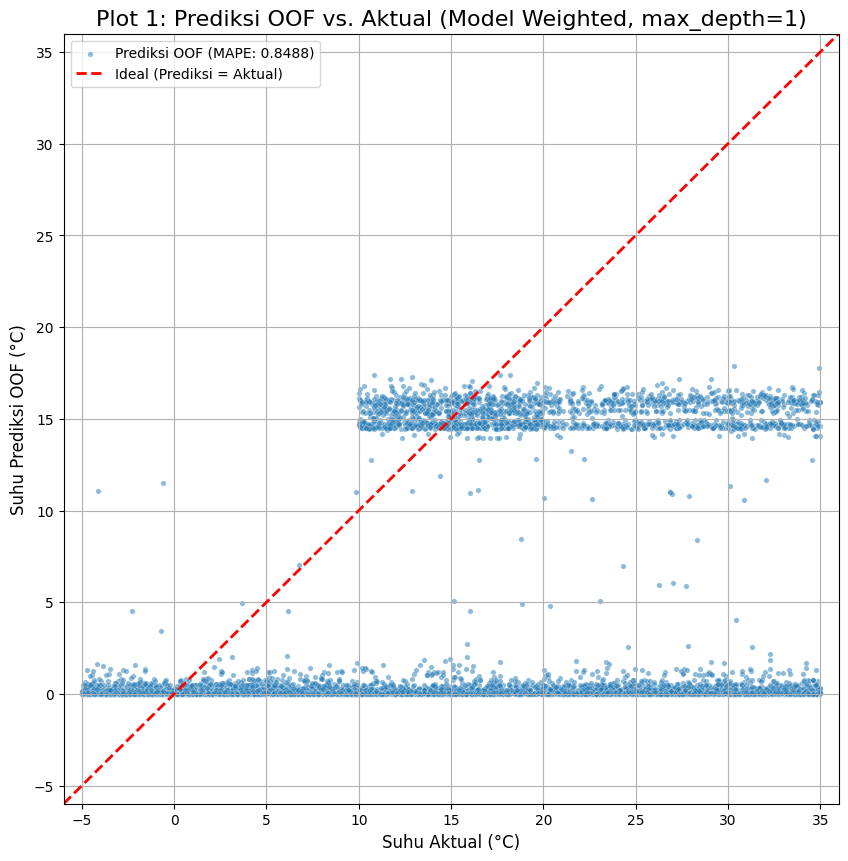

Membuat Plot 2: Residuals vs. Predicted...
Plot 2 (Residuals vs Predicted - Weighted) disimpan.


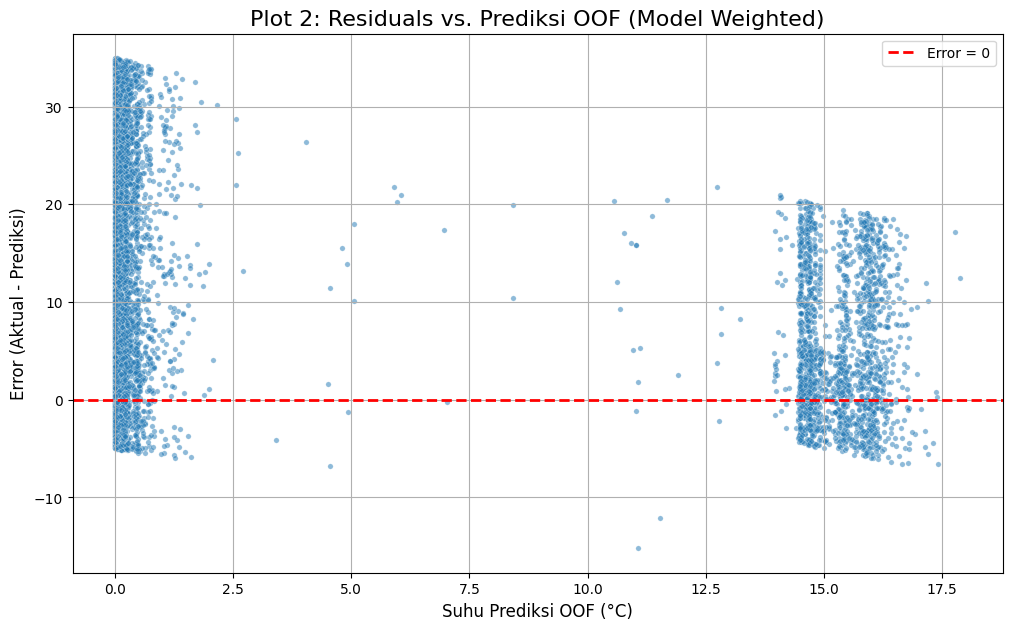


--- Top 20 Residual Terbesar (Weighted Model) ---
|    Actual |   OOF_Predicted |   Residual |   Abs_Residual |
|----------:|----------------:|-----------:|---------------:|
| 34.970000 |        0.014709 |  34.955291 |      34.955291 |
| 34.980000 |        0.045519 |  34.934481 |      34.934481 |
| 34.980000 |        0.053079 |  34.926921 |      34.926921 |
| 34.980000 |        0.054085 |  34.925915 |      34.925915 |
| 34.900000 |        0.000000 |  34.900000 |      34.900000 |
| 34.970000 |        0.079537 |  34.890463 |      34.890463 |
| 34.890000 |        0.000000 |  34.890000 |      34.890000 |
| 34.920000 |        0.056283 |  34.863717 |      34.863717 |
| 34.880000 |        0.027467 |  34.852533 |      34.852533 |
| 34.920000 |        0.073109 |  34.846891 |      34.846891 |
| 34.890000 |        0.056332 |  34.833668 |      34.833668 |
| 34.840000 |        0.007332 |  34.832668 |      34.832668 |
| 34.910000 |        0.086954 |  34.823046 |      34.823046 |
| 34.890000 |      

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # Import os module

print("--- Menganalisis Hasil OOF dari Weighted Training ---")

oof_filename = 'oof_analysis_data_weighted_thresh_0_25.csv'

try:
    # 1. Muat data OOF
    if not os.path.exists(oof_filename):
        raise FileNotFoundError(f"File '{oof_filename}' tidak ditemukan.")

    oof_df = pd.read_csv(oof_filename)
    print(f"File '{oof_filename}' berhasil dimuat.")

    # Hitung MAPE dari file (untuk judul plot)
    epsilon = 1e-9
    actual_safe = np.maximum(np.abs(oof_df['Actual']), epsilon)
    # Pastikan tidak ada NaN/inf di prediksi sebelum menghitung MAPE
    oof_df['OOF_Predicted'] = oof_df['OOF_Predicted'].fillna(0)
    oof_preds_safe = np.nan_to_num(oof_df['OOF_Predicted'], nan=0.0, posinf=0.0, neginf=0.0)

    mape_oof = np.mean(np.abs(oof_df['Actual'] - oof_preds_safe) / actual_safe)
    print(f"MAPE OOF dihitung dari file: {mape_oof:.8f}")

    # Hitung ulang Residual jika belum ada atau untuk memastikan konsistensi
    if 'Residual' not in oof_df.columns:
        print("Menghitung kolom Residual...")
        oof_df['Residual'] = oof_df['Actual'] - oof_df['OOF_Predicted']

    # 2. Plot: Prediksi OOF vs. Aktual
    print("Membuat Plot 1: Actual vs. Predicted...")
    plt.figure(figsize=(10, 10))
    sns.scatterplot(data=oof_df, x='Actual', y='OOF_Predicted', alpha=0.5, s=15, label=f'Prediksi OOF (MAPE: {mape_oof:.4f})')
    # Garis ideal y=x
    min_val = min(oof_df['Actual'].min(), oof_df['OOF_Predicted'].min()) - 1 # Tambahkan buffer
    max_val = max(oof_df['Actual'].max(), oof_df['OOF_Predicted'].max()) + 1 # Tambahkan buffer
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Ideal (Prediksi = Aktual)')
    plt.title(f'Plot 1: Prediksi OOF vs. Aktual (Model Weighted, max_depth=1)', fontsize=16)
    plt.xlabel('Suhu Aktual (°C)', fontsize=12)
    plt.ylabel('Suhu Prediksi OOF (°C)', fontsize=12)
    plt.xlim(min_val, max_val) # Atur batas plot
    plt.ylim(min_val, max_val)
    plt.legend()
    plt.grid(True)
    plt.savefig('plot_oof_actual_vs_predicted_weighted.png')
    print("Plot 1 (Actual vs Predicted - Weighted) disimpan.")
    plt.show()


    # 3. Plot: Residuals vs. Prediksi
    print("Membuat Plot 2: Residuals vs. Predicted...")
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=oof_df, x='OOF_Predicted', y='Residual', alpha=0.5, s=15)
    plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Error = 0')
    plt.title('Plot 2: Residuals vs. Prediksi OOF (Model Weighted)', fontsize=16)
    plt.xlabel('Suhu Prediksi OOF (°C)', fontsize=12)
    plt.ylabel('Error (Aktual - Prediksi)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.savefig('plot_oof_residuals_vs_predicted_weighted.png')
    print("Plot 2 (Residuals vs Predicted - Weighted) disimpan.")
    plt.show()


    # 4. Tampilkan Top 20 Residual Terbesar
    print("\n--- Top 20 Residual Terbesar (Weighted Model) ---")
    oof_df['Abs_Residual'] = oof_df['Residual'].abs()
    top_20_residuals = oof_df.sort_values(by='Abs_Residual', ascending=False).head(20)
    # Tampilkan dengan format markdown agar lebih rapi
    print(top_20_residuals[['Actual', 'OOF_Predicted', 'Residual', 'Abs_Residual']].to_markdown(index=False, floatfmt=".6f"))

except FileNotFoundError:
    print("\n--- ERROR ---")
    print(f"File '{oof_filename}' tidak ditemukan.")
except Exception as e:
    print(f"\nTerjadi kesalahan saat analisis: {e}")

# Evaluasi Model

Skor OOF MAPE: **0.8488**

**Kesimpulan Diagnosis:** Model mengalami **underfitting yang parah dan struktural**.

Model ini "terjebak" dalam prediksi yang sangat sederhana dan **secara fundamental gagal** mempelajari data. Ia tidak mampu memetakan fitur ke range suhu yang bervariasi.

---

### Analisis Plot 1: Prediksi OOF vs. Aktual

Plot ini menunjukkan prediksi model (sumbu Y) terhadap nilai asli (sumbu X).

* **Garis Ideal (Merah):** Di sinilah prediksi sempurna (Prediksi = Aktual) seharusnya berada.
* **Data Poin (Biru):** Ini adalah prediksi model kita.

**Observasi Kunci:**
* Prediksi *tidak* tersebar di sekitar garis merah. Sebaliknya, prediksi "terjebak" dalam **tiga pita horizontal (bands)** yang jelas: satu di sekitar Y=0, satu di Y=5, dan satu lagi di Y=15.
* Model **hanya "percaya diri" memprediksi nilai** di rentang 0-2.5°C dan 14-17°C.
* **Fakta Kritis:** Model ini **terbukti tidak bisa memprediksi suhu di atas ~17°C sama sekali**. Untuk semua data aktual dari 10°C hingga 35°C, model hanya menebak di pita 14-17°C.

**Kesimpulan:** Ini adalah tanda klasik dari **underfitting parah (high bias)**. Model ini terlalu sederhana untuk menangkap pola.



---

### Analisis Plot 2: Residuals vs. Prediksi OOF

Plot ini memetakan error (Aktual - Prediksi) terhadap nilai yang diprediksi model.

**Observasi Kunci:**
* Plot ini mengkonfirmasi temuan dari Plot 1. Sumbu X (Prediksi OOF) menunjukkan bahwa model hanya memprediksi nilai di sekitar 0, 5, dan 15.
* **Error tidak acak**. Saat model memprediksi ~0-2.5°C, error-nya (di sumbu Y) berkisar dari -5 hingga +35. Ini sangat besar dan sistematis.
* Pola error yang tidak acak ini menunjukkan bahwa model telah melewatkan pola yang sangat jelas dalam data.



---

### Analisis Tabel: 20 Residual Terbesar

Tabel ini menunjukkan di mana model membuat kesalahan terbesar.

**Observasi Kunci:**
* **Kolom `Actual`:** Semua nilai *sebenarnya* adalah suhu yang sangat panas (misalnya: 34.97°C, 34.98°C, 34.90°C).
* **Kolom `OOF_Predicted`:** Untuk semua suhu panas ini, model **salah menebak** dengan nilai yang sangat rendah (misalnya: 0.01°C, 0.04°C, 0.00°C).

**Kesimpulan:** Kegagalan terbesar model adalah pada data dengan suhu tinggi. Ironisnya, ini adalah data yang *seharusnya* ditangani oleh **Weighted Training** (yang kita atur untuk `TEMP_THRESHOLD_HIGH = 25`). Ini menunjukkan bahwa batasan `max_depth=1` jauh lebih kuat daripada efek pembobotan; model *tidak dapat* menemukan cara untuk memisahkan data suhu tinggi ini dan akhirnya menggabungkannya dengan data suhu rendah.

---

### Hipotesis Baru

Setelah melakukan eksperimen dengan max_depth yang lebih tinggi, implikasinya adalah mape score yang semakin naik (semakin jelek).

**Hipotesis Paling Mungkin:** Model `max_depth=1` "Bodoh tapi Aman".

1.  **Model `max_depth=1` (MAPE = 0.84):** Model ini hanya membuat 3 tebakan (0, 5, 15). Saat dihadapkan data 35°C, ia menebak 0°C. Error-nya `(35-0)/35` ≈ 100%. Saat dihadapkan data 0.1°C, ia menebak 0°C. Error-nya kecil. Model ini **stabil** dan menghindari error persentase yang gila.

2.  **Model `max_depth=5` :** Model yang lebih dalam *mencoba* memprediksi data 35°C, terdorong oleh *weighting*. Tapi, mungkin fitur untuk data 35°C dan 0.1°C terlihat mirip.

3.  Akibatnya, model menjadi bingung. Ia mungkin salah memprediksi data `Actual=0.1°C` sebagai `Predicted=15°C`.

4.  **Error MAPE Meledak:** Error untuk satu titik itu adalah `(15 - 0.1) / 0.1` = `14.9 / 0.1` = **14900%**

5.  Satu kesalahan katastropik pada data bernilai rendah ini sudah cukup untuk **menghancurkan skor MAPE keseluruhan**, meskipun model itu mungkin *sedikit lebih baik* dalam memprediksi data 35°C.

Model `max_depth=1` kemungkinan besar "curang" dengan cara tidak pernah membuat kesalahan besar pada data bernilai rendah, dengan mengorbankan semua data bernilai tinggi.

---

### Next Improvement Implementation

Masalahnya ada pada **sensitivitas MAPE** dan **rentang target yang ekstrim** (0 hingga 35). Kita harus mengubah pendekatan fundamental.


**Tinjau Ulang Fitur**
    * **Masalah:** Fitur mungkin tidak cukup baik untuk memisahkan data 0°C dan 35°C.
    * **Solusi:** Coba buang fitur yang berisiko *overfitting* seperti `Target_Mean_...` dan latih HANYA dengan fitur Z-Score, K-Means, dan fitur domain (rasio, dll).

---